# Classification

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pprint import pprint

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from helpers import dump_pickle, load_pickle

In [32]:
df = load_pickle('tass/dfCoded')
tfidf = load_pickle('tass/tfidf')
data_train = load_pickle('tass/data_train')
data_test = load_pickle('tass/data_test')
features_train = load_pickle('tass/features_train')
features_test = load_pickle('tass/features_test')
data_test = load_pickle('tass/data_test')
labels_train = load_pickle('tass/labels_train')
labels_test = load_pickle('tass/labels_test')

In [5]:
df = load_pickle('tass/max_df/dfCoded')
tfidf = load_pickle('tass/max_df/tfidf')
data_train = load_pickle('tass/max_df/data_train')
data_test = load_pickle('tass/max_df/data_test')
features_train = load_pickle('tass/max_df/features_train')
features_test = load_pickle('tass/max_df/features_test')
data_test = load_pickle('tass/max_df/data_test')
labels_train = load_pickle('tass/max_df/labels_train')
labels_test = load_pickle('tass/max_df/labels_test')

In [ ]:
# d = {
#      'Model': 'Random Forest',
#      'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
#      'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
# }

# df_models_rfc = pd.DataFrame(d, index=[0])

## Base classifiers

In [51]:
def base_classify(classifier):
    pprint(classifier.get_params())
    cv = ShuffleSplit(n_splits=3, test_size=.33, random_state=26)
    classifier.fit(features_train, labels_train)
    print('')
    print(accuracy_score(labels_test, classifier.predict(features_test)))

### Random Forest

In [16]:
rfc_base = RandomForestClassifier(random_state=26, n_jobs=-1)
base_classify(rfc_base)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 26,
 'verbose': 0,
 'warm_start': False}

0.8826498422712934


### Support Vector Machine

In [52]:
svc_base = svm.SVC(random_state=26)
base_classify(svc_base)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 26,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

0.9041009463722397


### K Nearest Neighbors

In [18]:
knn_base = KNeighborsClassifier(n_jobs=-1)
base_classify(knn_base)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

0.8769716088328076


### Multinomial Naïve Bayes

In [50]:
mnbc_base = MultinomialNB()
base_classify(mnbc_base)

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

0.8649842271293375


### Multinomial Logistic Regression

In [20]:
lr_base = LogisticRegression(random_state=26, n_jobs=-1)
base_classify(lr_base)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 26,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

0.8927444794952681


### Gradient Boosting Machine

In [21]:
gbm_base = GradientBoostingClassifier(random_state=26)
base_classify(gbm_base)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 26,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

0.873186119873817


## Random search

In [135]:
def random_search(classifier, grid, n_iter=50):
    search = RandomizedSearchCV(
        estimator=classifier,
        param_distributions=grid,
        n_iter=n_iter,
        n_jobs=-1,
        scoring='accuracy',
        cv=ShuffleSplit(n_splits=3, test_size=.33, random_state=26),
        verbose=1, 
        random_state=26,
    )

    search.fit(features_train, labels_train)

    pprint(search.best_params_)
    print('')
    print(search.best_score_)
    return search

### Random Forest

In [136]:
rfc_random = RandomForestClassifier(random_state=26, n_jobs=-1)
rfc_random_grid = {
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [20, 40, 60, 80, 100, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [200, 400, 600, 800, 1000],
}

rfc_random_search = random_search(rfc_random, rfc_random_grid)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 800}

0.8743814664867297


### Support Vector Machine

In [152]:
svm_random = svm.SVC(random_state=26, verbose=1)
svm_random_grid = {
    'C': [.0001, .001, .01],
    'gamma': [.0001, .001, .01, .1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [1, 2, 3, 4, 5],
    'probability': [True],
}

svm_random_search = random_search(svm_random, svm_random_grid)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
*.*.
*
optimization finished, #iter = 1015
obj = -0.198163, rho = 0.993537
nSV = 1984, nBSV = 1984
Total nSV = 1984
.
*
optimization finished, #iter = 1024
obj = -0.199583, rho = 0.994018
nSV = 1998, nBSV = 1998
Total nSV = 1998

*
optimization finished, #iter = 1011
obj = -0.201939, rho = -0.000672
nSV = 2022, nBSV = 2022
Total nSV = 2022
*
optimization finished, #iter = 992
obj = -0.198400, rho = 0.999996
nSV = 1984, nBSV = 1984
Total nSV = 1984
*.*.
*
optimization finished, #iter = 1007
obj = -19.835211, rho = 0.999016
nSV = 1984, nBSV = 1984
Total nSV = 1984
.
*
optimization finished, #iter = 1011
obj = -0.202200, rho = -0.000001
nSV = 2022, nBSV = 2022
Total nSV = 2022

*
optimization finished, #iter = 1010
obj = -19.975573, rho = 0.999051
nSV = 1998, nBSV = 1998
Total nSV = 1998
.
*
optimization finished, #iter = 1011
obj = -20.214795, rho = -0.000134
nSV = 2022, nBSV = 2022
Total nSV = 2022
*.
*
optimization finished,

*
optimization finished, #iter = 928
obj = -0.177836, rho = 0.995578
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 947
obj = -0.183994, rho = 0.993835
nSV = 1844, nBSV = 1844
Total nSV = 1844
*
optimization finished, #iter = 943
obj = -0.180607, rho = 0.995172
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 891
obj = -0.178200, rho = 0.999996
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 922
obj = -0.184400, rho = 0.999994
nSV = 1844, nBSV = 1844
Total nSV = 1844
*
optimization finished, #iter = 894
obj = -17.812548, rho = 0.999163
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 911
obj = -18.091982, rho = 0.999047
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 930
obj = -18.431792, rho = 0.998883
nSV = 1844, nBSV = 1844
Total nSV = 1844
*
optimization finished, #iter = 941
obj = -0.180605, rho = 0.994735
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optim


*
optimization finished, #iter = 1178
obj = -0.235599, rho = -0.999990
nSV = 2356, nBSV = 2356
.
*
optimization finished, #iter = 1190
obj = -0.237999, rho = -0.999990
nSV = 2380, nBSV = 2380
*
optimization finished, #iter = 965
obj = -19.141645, rho = 0.998561
nSV = 1916, nBSV = 1916
Total nSV = 1916

*
optimization finished, #iter = 1178
obj = -0.234241, rho = -0.989830
nSV = 2356, nBSV = 2356

*
optimization finished, #iter = 1206
obj = -0.239767, rho = -0.990137
nSV = 2412, nBSV = 2412
*
optimization finished, #iter = 981
obj = -0.189824, rho = 0.993611
nSV = 1902, nBSV = 1902
Total nSV = 1902
*
optimization finished, #iter = 958
obj = -0.191600, rho = 0.999994
nSV = 1916, nBSV = 1916
Total nSV = 1916
*
optimization finished, #iter = 951
obj = -0.190200, rho = 0.999995
nSV = 1902, nBSV = 1902
Total nSV = 1902
*
optimization finished, #iter = 978
obj = -0.191187, rho = 0.992680
nSV = 1916, nBSV = 1916
Total nSV = 1916
*
optimization finished, #iter = 970
obj = -0.184455, rho = 0.99

*
optimization finished, #iter = 948
obj = -0.181032, rho = 0.994238
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 944
obj = -0.180032, rho = 0.994517
nSV = 1804, nBSV = 1804
Total nSV = 1804
*
optimization finished, #iter = 908
obj = -18.072493, rho = 0.998869
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter = 904
obj = -18.052153, rho = 0.998774
nSV = 1806, nBSV = 1806
Total nSV = 1806
*
optimization finished, #iter = 908
obj = -18.092445, rho = 0.998893
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 930
obj = -0.186000, rho = 0.999993
nSV = 1860, nBSV = 1860
Total nSV = 1860
*
optimization finished, #iter = 913
obj = -0.182600, rho = 0.999994
nSV = 1826, nBSV = 1826
Total nSV = 1826
*
optimization finished, #iter = 945
obj = -0.182206, rho = 0.993588
nSV = 1826, nBSV = 1826
Total nSV = 1826
*
optimization finished, #iter = 926
obj = -0.175664, rho = 0.995017
nSV = 1760, nBSV = 1760
Total nSV = 1760
*
optim


*
optimization finished, #iter = 1178
obj = -0.234092, rho = -0.989168
nSV = 2356, nBSV = 2356
*
optimization finished, #iter = 946
obj = -0.189200, rho = 0.999994
nSV = 1892, nBSV = 1892
Total nSV = 1892
*
optimization finished, #iter = 950
obj = -0.190000, rho = 0.999994
nSV = 1900, nBSV = 1900
Total nSV = 1900
*
optimization finished, #iter = 954
obj = -18.900283, rho = 0.998459
nSV = 1892, nBSV = 1892
Total nSV = 1892
*
optimization finished, #iter = 969
obj = -0.189506, rho = 0.992588
nSV = 1900, nBSV = 1900
Total nSV = 1900
*
optimization finished, #iter = 953
obj = -18.899898, rho = 0.998423
nSV = 1892, nBSV = 1892
Total nSV = 1892
*
optimization finished, #iter = 950
obj = -0.183163, rho = 0.994266
nSV = 1836, nBSV = 1836
Total nSV = 1836
*
optimization finished, #iter = 969
obj = -19.239753, rho = 0.998417
nSV = 1926, nBSV = 1926
Total nSV = 1926
*
optimization finished, #iter = 974
obj = -0.188713, rho = 0.993328
nSV = 1892, nBSV = 1892
Total nSV = 1892
*
optimization finish

*
optimization finished, #iter = 902
obj = -18.020488, rho = -0.995973
nSV = 1804, nBSV = 1804
Total nSV = 1804
*
optimization finished, #iter = 908
obj = -0.180598, rho = -0.979387
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 907
obj = -0.181399, rho = -0.999980
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 907
obj = -0.180400, rho = -0.978988
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 907
obj = -0.180424, rho = -0.979579
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 900
obj = -0.179999, rho = -0.999980
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 920
obj = -18.378839, rho = -0.995610
nSV = 1840, nBSV = 1840
Total nSV = 1840
*
optimization finished, #iter = 909
obj = -18.160056, rho = -0.995852
nSV = 1818, nBSV = 1818
Total nSV = 1818
*
optimization finished, #iter = 891
obj = -0.177261, rho = -0.981562
nSV = 1782, nBSV = 1782
Total nSV = 178

*
optimization finished, #iter = 907
obj = -18.087471, rho = 0.997442
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 902
obj = -18.027699, rho = -0.997952
nSV = 1804, nBSV = 1804
Total nSV = 1804
*
optimization finished, #iter = 937
obj = -0.186411, rho = -0.986890
nSV = 1874, nBSV = 1874
Total nSV = 1874
*
optimization finished, #iter = 925
obj = -18.466763, rho = 0.997014
nSV = 1848, nBSV = 1848
Total nSV = 1848
*
optimization finished, #iter = 941
obj = -0.188199, rho = 0.999982
nSV = 1882, nBSV = 1882
Total nSV = 1882
*
optimization finished, #iter = 945
obj = -0.179146, rho = 0.982185
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 926
obj = -0.185199, rho = 0.999983
nSV = 1852, nBSV = 1852
Total nSV = 1852
*
optimization finished, #iter = 948
obj = -0.187184, rho = 0.976713
nSV = 1882, nBSV = 1882
Total nSV = 1882
*
optimization finished, #iter = 904
obj = -18.067251, rho = -0.997651
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
o

*
optimization finished, #iter = 991
obj = -19.819512, rho = 0.999910
nSV = 1982, nBSV = 1982
Total nSV = 1982
*
optimization finished, #iter = 985
obj = -19.699521, rho = 0.999908
nSV = 1970, nBSV = 1970
Total nSV = 1970
*
optimization finished, #iter = 972
obj = -19.439578, rho = 0.999916
nSV = 1944, nBSV = 1944
Total nSV = 1944
*.
*
optimization finished, #iter = 1012
obj = -1.974771, rho = 0.973554
nSV = 1984, nBSV = 1984
Total nSV = 1984
.
*
optimization finished, #iter = 1019
obj = -1.973090, rho = 0.974060
nSV = 1983, nBSV = 1981
Total nSV = 1983
*
optimization finished, #iter = 992
obj = -0.198400, rho = 0.999995
nSV = 1984, nBSV = 1984
Total nSV = 1984
.
*
optimization finished, #iter = 1024
obj = -1.989487, rho = 0.975249
nSV = 1999, nBSV = 1997
Total nSV = 1999
.
*
optimization finished, #iter = 1009
obj = -20.179496, rho = -0.999851
nSV = 2018, nBSV = 2018
Total nSV = 2018
.
*
optimization finished, #iter = 983
obj = -19.659523, rho = 0.999912
nSV = 1966, nBSV = 1966
Total 

.
*
optimization finished, #iter = 1131
obj = -22.618796, rho = -0.999878
nSV = 2262, nBSV = 2262
*
optimization finished, #iter = 933
obj = -1.767948, rho = 0.984054
nSV = 1788, nBSV = 1776
Total nSV = 1788
.
*
optimization finished, #iter = 1143
obj = -2.262399, rho = -0.973595
nSV = 2286, nBSV = 2286
*.*
optimization finished, #iter = 1008
obj = -0.140379, rho = 0.587852
nSV = 1832, nBSV = 1721
Total nSV = 1832
*
optimization finished, #iter = 958
obj = -19.158137, rho = 0.999845
nSV = 1916, nBSV = 1916
Total nSV = 1916
*
optimization finished, #iter = 965
obj = -19.298153, rho = 0.999836
nSV = 1930, nBSV = 1930
Total nSV = 1930
*
optimization finished, #iter = 966
obj = -0.193199, rho = 0.999992
nSV = 1932, nBSV = 1932
Total nSV = 1932
*
optimization finished, #iter = 939
obj = -1.794883, rho = 0.982605
nSV = 1812, nBSV = 1808
Total nSV = 1812
*
optimization finished, #iter = 972
obj = -19.438119, rho = 0.999849
nSV = 1944, nBSV = 1944
Total nSV = 1944
*
optimization finished, #ite

*
optimization finished, #iter = 981
obj = -0.150194, rho = 0.236298
nSV = 1911, nBSV = 1877
Total nSV = 1911
*
optimization finished, #iter = 908
obj = -0.181600, rho = 0.999996
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 968
obj = -1.855988, rho = 0.977049
nSV = 1873, nBSV = 1867
Total nSV = 1873
.*
optimization finished, #iter = 937
obj = -18.739231, rho = 0.999891
nSV = 1874, nBSV = 1874
Total nSV = 1874

*
optimization finished, #iter = 1191
obj = -2.326530, rho = -0.964526
nSV = 2381, nBSV = 2379
*
optimization finished, #iter = 931
obj = -18.619268, rho = 0.999907
nSV = 1862, nBSV = 1862
Total nSV = 1862
*
optimization finished, #iter = 902
obj = -18.039346, rho = 0.999910
nSV = 1804, nBSV = 1804
Total nSV = 1804
*.*
optimization finished, #iter = 1001
obj = -0.148966, rho = 0.528955
nSV = 1877, nBSV = 1794
Total nSV = 1877
.*
optimization finished, #iter = 971
obj = -1.859942, rho = 0.976533
nSV = 1876, nBSV = 1872
Total nSV = 1876
.
*
optimization


*
optimization finished, #iter = 1131
obj = -22.618852, rho = -0.999859
nSV = 2262, nBSV = 2262
*
optimization finished, #iter = 946
obj = -1.795693, rho = 0.980025
nSV = 1812, nBSV = 1808
Total nSV = 1812
*
optimization finished, #iter = 950
obj = -18.997973, rho = 0.999859
nSV = 1900, nBSV = 1900
Total nSV = 1900
*
optimization finished, #iter = 944
obj = -1.790896, rho = 0.977754
nSV = 1807, nBSV = 1805
Total nSV = 1807
*
optimization finished, #iter = 960
obj = -0.191999, rho = 0.999992
nSV = 1920, nBSV = 1920
Total nSV = 1920
*.*
optimization finished, #iter = 1030
obj = -0.140030, rho = 0.601304
nSV = 1842, nBSV = 1710
Total nSV = 1842
.*
optimization finished, #iter = 963
obj = -19.257913, rho = 0.999844
nSV = 1926, nBSV = 1926
Total nSV = 1926
*
optimization finished, #iter = 971
obj = -19.417929, rho = -0.999493
nSV = 1942, nBSV = 1942
Total nSV = 1942

*
optimization finished, #iter = 1143
obj = -2.263210, rho = -0.973665
nSV = 2286, nBSV = 2286
*
optimization finished, #ite

*
optimization finished, #iter = 907
obj = -18.139112, rho = 0.999881
nSV = 1814, nBSV = 1814
Total nSV = 1814
.*
optimization finished, #iter = 979
obj = -1.887533, rho = 0.967039
nSV = 1927, nBSV = 1925
Total nSV = 1927

*
optimization finished, #iter = 1137
obj = -0.227399, rho = -0.999993
nSV = 2274, nBSV = 2274
*
optimization finished, #iter = 931
obj = -18.619043, rho = 0.999884
nSV = 1862, nBSV = 1862
Total nSV = 1862
*.*
optimization finished, #iter = 1044
obj = -0.143329, rho = 0.498566
nSV = 1899, nBSV = 1793
Total nSV = 1899
*
optimization finished, #iter = 957
obj = -19.138958, rho = 0.999859
nSV = 1914, nBSV = 1914
Total nSV = 1914
.*
optimization finished, #iter = 904
obj = -18.079128, rho = 0.999892
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter = 969
obj = -1.836988, rho = 0.978104
nSV = 1856, nBSV = 1852
Total nSV = 1856

*
optimization finished, #iter = 1190
obj = -2.320117, rho = -0.958133
nSV = 2380, nBSV = 2380
*
optimization finished, #ite

.
*
optimization finished, #iter = 1131
obj = -22.616868, rho = 0.999574
nSV = 2262, nBSV = 2262
*
optimization finished, #iter = 909
obj = -1.779653, rho = -0.914811
nSV = 1818, nBSV = 1818
Total nSV = 1818

*
optimization finished, #iter = 1128
obj = -22.556895, rho = 0.999558
nSV = 2256, nBSV = 2256
*
optimization finished, #iter = 905
obj = -0.180999, rho = 0.999990
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 943
obj = -0.123767, rho = -0.251407
nSV = 1740, nBSV = 1648
Total nSV = 1740
*
optimization finished, #iter = 920
obj = -1.799244, rho = -0.909143
nSV = 1840, nBSV = 1840
Total nSV = 1840
*
optimization finished, #iter = 906
obj = -18.118766, rho = -0.999789
nSV = 1812, nBSV = 1812
Total nSV = 1812
*
optimization finished, #iter = 900
obj = -17.998754, rho = -0.999778
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 891
obj = -17.818814, rho = -0.999815
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #it

*
optimization finished, #iter = 932
obj = -0.098273, rho = -0.483494
nSV = 1571, nBSV = 1351
Total nSV = 1571
*
optimization finished, #iter = 936
obj = -18.718018, rho = -0.999750
nSV = 1872, nBSV = 1872
Total nSV = 1872
*
optimization finished, #iter = 941
obj = -18.818005, rho = 0.999634
nSV = 1882, nBSV = 1882
Total nSV = 1882
*
optimization finished, #iter = 885
obj = -1.748136, rho = -0.966639
nSV = 1770, nBSV = 1770
Total nSV = 1770
*
optimization finished, #iter = 934
obj = -1.815301, rho = 0.911021
nSV = 1853, nBSV = 1851
Total nSV = 1853
*
optimization finished, #iter = 904
obj = -1.783967, rho = -0.955322
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter = 913
obj = -18.258145, rho = 0.999671
nSV = 1826, nBSV = 1826
Total nSV = 1826
.*
optimization finished, #iter = 1139
obj = -0.110723, rho = 0.505352
nSV = 1828, nBSV = 1515
Total nSV = 5665
*
optimization finished, #iter = 936
obj = -18.718015, rho = 0.999663
nSV = 1872, nBSV = 1872
Total nSV = 1872


.
*
optimization finished, #iter = 1009
obj = -20.130461, rho = -0.985312
nSV = 2018, nBSV = 2018
Total nSV = 2018
*.*
optimization finished, #iter = 1033
obj = -0.137604, rho = 0.687705
nSV = 1830, nBSV = 1683
Total nSV = 1830
.*.*
optimization finished, #iter = 1021
obj = -0.137946, rho = 0.648902
nSV = 1816, nBSV = 1687
Total nSV = 1816

*
optimization finished, #iter = 1021
obj = -1.976280, rho = 0.936209
nSV = 2000, nBSV = 1996
Total nSV = 2000
.
*
optimization finished, #iter = 1015
obj = -1.959195, rho = 0.933268
nSV = 1983, nBSV = 1981
Total nSV = 1983
*.
*
optimization finished, #iter = 1018
obj = -19.615893, rho = 0.988021
nSV = 1966, nBSV = 1966
Total nSV = 1966
.
*
optimization finished, #iter = 1033
obj = -19.799782, rho = 0.988792
nSV = 1984, nBSV = 1984
Total nSV = 1984
*.*
optimization finished, #iter = 1048
obj = -0.137343, rho = 0.693046
nSV = 1831, nBSV = 1672
Total nSV = 1831
*.
*
optimization finished, #iter = 1010
obj = -1.924913, rho = 0.945125
nSV = 1947, nBSV =

..*
optimization finished, #iter = 1209
obj = -0.105264, rho = 0.769576
nSV = 1741, nBSV = 1305
Total nSV = 1741
*
optimization finished, #iter = 998
obj = -0.152052, rho = 0.385864
nSV = 1914, nBSV = 1872
Total nSV = 1914

*
optimization finished, #iter = 1143
obj = -2.224158, rho = -0.926414
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 993
obj = -19.120577, rho = 0.982669
nSV = 1930, nBSV = 1930
Total nSV = 1930
*.
*
optimization finished, #iter = 1000
obj = -19.257307, rho = 0.983468
nSV = 1944, nBSV = 1944
Total nSV = 1944
*
optimization finished, #iter = 940
obj = -1.770527, rho = 0.945980
nSV = 1811, nBSV = 1809
Total nSV = 1811
*
optimization finished, #iter = 977
obj = -1.823712, rho = 0.906476
nSV = 1916, nBSV = 1916
Total nSV = 1916
*
optimization finished, #iter = 940
obj = -1.752734, rho = 0.956817
nSV = 1792, nBSV = 1788
Total nSV = 1792
*
optimization finished, #iter = 976
obj = -18.553159, rho = 0.985028
nSV = 1872, nBSV = 1872
Total nSV = 1872
*.*
optimizati

.*
optimization finished, #iter = 968
obj = -18.276803, rho = 0.991280
nSV = 1834, nBSV = 1834
Total nSV = 1834

*
optimization finished, #iter = 1206
obj = -2.268709, rho = -0.901372
nSV = 2412, nBSV = 2412
*
optimization finished, #iter = 976
obj = -18.666685, rho = 0.987776
nSV = 1874, nBSV = 1874
Total nSV = 1874
*.*
optimization finished, #iter = 1016
obj = -0.139983, rho = 0.588651
nSV = 1836, nBSV = 1707
Total nSV = 1836
*.*
optimization finished, #iter = 1030
obj = -0.136510, rho = 0.625227
nSV = 1814, nBSV = 1650
Total nSV = 1814
*
optimization finished, #iter = 976
obj = -1.864400, rho = 0.935325
nSV = 1903, nBSV = 1901
Total nSV = 1903
*
optimization finished, #iter = 966
obj = -1.836730, rho = 0.937256
nSV = 1876, nBSV = 1872
Total nSV = 1876
*
optimization finished, #iter = 977
obj = -18.551012, rho = 0.989919
nSV = 1862, nBSV = 1862
Total nSV = 1862
*
optimization finished, #iter = 964
obj = -1.813549, rho = 0.947139
nSV = 1850, nBSV = 1846
Total nSV = 1850
*
optimization


*
optimization finished, #iter = 1143
obj = -22.742960, rho = -0.985534
nSV = 2286, nBSV = 2286
.
*
optimization finished, #iter = 1128
obj = -22.443278, rho = -0.985021
nSV = 2256, nBSV = 2256
.*
optimization finished, #iter = 948
obj = -1.786656, rho = 0.934907
nSV = 1827, nBSV = 1825
Total nSV = 1827

*
optimization finished, #iter = 1131
obj = -22.507117, rho = -0.986114
nSV = 2262, nBSV = 2262
*
optimization finished, #iter = 971
obj = -1.799899, rho = 0.908497
nSV = 1901, nBSV = 1899
Total nSV = 1901
*.*
optimization finished, #iter = 1025
obj = -0.143298, rho = 0.513416
nSV = 1870, nBSV = 1777
Total nSV = 1870
*
optimization finished, #iter = 997
obj = -0.143893, rho = 0.455596
nSV = 1894, nBSV = 1824
Total nSV = 1894
*
optimization finished, #iter = 984
obj = -18.803135, rho = 0.982275
nSV = 1900, nBSV = 1900
Total nSV = 1900
*
optimization finished, #iter = 929
obj = -1.726539, rho = 0.950315
nSV = 1761, nBSV = 1759
Total nSV = 1761
*
optimization finished, #iter = 970
obj = 

*
optimization finished, #iter = 953
obj = -17.938137, rho = 0.989796
nSV = 1802, nBSV = 1802
Total nSV = 1802
.
*
optimization finished, #iter = 1206
obj = -2.251960, rho = -0.880677
nSV = 2412, nBSV = 2412
*
optimization finished, #iter = 975
obj = -0.122021, rho = -0.332988
nSV = 1730, nBSV = 1602
Total nSV = 1730
*
optimization finished, #iter = 877
obj = -0.094854, rho = 0.337161
nSV = 1503, nBSV = 1341
Total nSV = 1503
*
optimization finished, #iter = 976
obj = -18.449788, rho = 0.988291
nSV = 1854, nBSV = 1854
Total nSV = 1854
*
optimization finished, #iter = 963
obj = -1.850562, rho = 0.922192
nSV = 1901, nBSV = 1899
Total nSV = 1901
*
optimization finished, #iter = 971
obj = -1.815220, rho = 0.938141
nSV = 1862, nBSV = 1862
Total nSV = 1862
*
optimization finished, #iter = 968
obj = -18.567250, rho = 0.987100
nSV = 1866, nBSV = 1866
Total nSV = 1866
*
optimization finished, #iter = 961
obj = -18.055287, rho = 0.988747
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization fin


*
optimization finished, #iter = 1154
obj = -2.127616, rho = 0.733471
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 914
obj = -0.097593, rho = -0.495254
nSV = 1559, nBSV = 1350
Total nSV = 1559
*
optimization finished, #iter = 986
obj = -0.096696, rho = -0.516960
nSV = 1585, nBSV = 1315
Total nSV = 1585
*
optimization finished, #iter = 900
obj = -17.804617, rho = -0.960155
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 891
obj = -17.635349, rho = -0.963710
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 907
obj = -1.714010, rho = -0.789878
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 906
obj = -1.750314, rho = -0.894241
nSV = 1812, nBSV = 1812
Total nSV = 1812
*
optimization finished, #iter = 909
obj = -1.715821, rho = -0.795681
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 936
obj = -0.097443, rho = -0.506683
nSV = 1572, nBSV = 1355
Total nSV = 1572
..*
optimizatio

*
optimization finished, #iter = 947
obj = -18.620238, rho = 0.954232
nSV = 1882, nBSV = 1882
Total nSV = 1882
*
optimization finished, #iter = 939
obj = -1.773031, rho = 0.769032
nSV = 1872, nBSV = 1872
Total nSV = 1872
*
optimization finished, #iter = 934
obj = -1.749017, rho = 0.795558
nSV = 1842, nBSV = 1842
Total nSV = 1842
*
optimization finished, #iter = 943
obj = -17.832083, rho = 0.964486
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 945
obj = -1.780443, rho = 0.767130
nSV = 1882, nBSV = 1882
Total nSV = 1882
.*
optimization finished, #iter = 936
obj = -18.525067, rho = -0.975449
nSV = 1872, nBSV = 1872
Total nSV = 1872
*
optimization finished, #iter = 921
obj = -1.714626, rho = 0.819505
nSV = 1801, nBSV = 1799
Total nSV = 1801
*
optimization finished, #iter = 938
obj = -1.761897, rho = 0.784817
nSV = 1858, nBSV = 1858
Total nSV = 1858
*
optimization finished, #iter = 947
obj = -18.624767, rho = 0.955191
nSV = 1882, nBSV = 1882
Total nSV = 1882
*
op

.*.*
optimization finished, #iter = 1002
obj = -18.829178, rho = 0.758263
nSV = 1976, nBSV = 1960
Total nSV = 1976
*.*
optimization finished, #iter = 1004
obj = -18.929023, rho = 0.738756
nSV = 1989, nBSV = 1976
Total nSV = 1989
*.*
optimization finished, #iter = 2319
obj = -24.558671, rho = -0.990621
nSV = 2541, nBSV = 1383
.*
optimization finished, #iter = 1848
obj = -18.392544, rho = 0.991079
nSV = 1962, nBSV = 924
Total nSV = 1962
*
optimization finished, #iter = 983
obj = -0.196600, rho = 1.000000
nSV = 1966, nBSV = 1966
Total nSV = 1966
.
*
optimization finished, #iter = 1009
obj = -0.201800, rho = -1.000000
nSV = 2018, nBSV = 2018
Total nSV = 2018
*
optimization finished, #iter = 992
obj = -0.198400, rho = 1.000000
nSV = 1984, nBSV = 1984
Total nSV = 1984
.*
optimization finished, #iter = 1849
obj = -19.186350, rho = 0.990624
nSV = 1989, nBSV = 1043
Total nSV = 1989
Line search fails in two-class probability estimates
.*
optimization finished, #iter = 1836
obj = -18.273262, rho 

*
optimization finished, #iter = 943
obj = -0.188600, rho = 1.000000
nSV = 1886, nBSV = 1886
Total nSV = 1886
*
optimization finished, #iter = 964
obj = -15.603723, rho = 0.657387
nSV = 1920, nBSV = 1912
Total nSV = 1920
*
optimization finished, #iter = 936
obj = -0.187200, rho = 1.000000
nSV = 1872, nBSV = 1872
Total nSV = 1872
*
optimization finished, #iter = 966
obj = -0.193200, rho = 1.000000
nSV = 1932, nBSV = 1932
Total nSV = 1932
..*
optimization finished, #iter = 1880
obj = -18.710247, rho = 0.990914
nSV = 1975, nBSV = 940
Total nSV = 1975
*
optimization finished, #iter = 1934
obj = -19.246763, rho = 0.990729
nSV = 2011, nBSV = 967
Total nSV = 2011
*.*
optimization finished, #iter = 1844
obj = -18.350879, rho = 0.990671
nSV = 1914, nBSV = 922
Total nSV = 1914
*
optimization finished, #iter = 964
*
optimization finished, #iter = 953
obj = -0.192800, rho = 1.000000
nSV = 1928, nBSV = 1928
obj = -15.436730, rho = 0.730874
Total nSV = 1928
nSV = 1892, nBSV = 1880
Total nSV = 1892
*

Line search fails in two-class probability estimates
*.*
optimization finished, #iter = 908
obj = -0.181600, rho = 1.000000
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 1866
obj = -18.570047, rho = 0.990725
nSV = 1943, nBSV = 933
Total nSV = 1943
.*
optimization finished, #iter = 1876
obj = -18.075187, rho = 0.991324
nSV = 1955, nBSV = 908
Total nSV = 1955
Line search fails in two-class probability estimates
*
optimization finished, #iter = 950
obj = -17.294770, rho = 0.808354
nSV = 1872, nBSV = 1854
Total nSV = 1872
*
optimization finished, #iter = 953
obj = -17.334335, rho = 0.763488
nSV = 1882, nBSV = 1866
Total nSV = 1882
*.
*
optimization finished, #iter = 1233
obj = -18.985481, rho = 0.990635
nSV = 1932, nBSV = 1629
Total nSV = 1932
..*.*
optimization finished, #iter = 1791
obj = -18.708654, rho = 0.990625
nSV = 1941, nBSV = 1029
Total nSV = 1941

*
optimization finished, #iter = 1168
obj = -0.233600, rho = -1.000000
nSV = 2336, nBSV = 2336

*
optimiz


*
optimization finished, #iter = 1135
obj = -20.288710, rho = -0.728750
nSV = 2262, nBSV = 2249
.
*
optimization finished, #iter = 1157
obj = -20.581098, rho = -0.737139
nSV = 2300, nBSV = 2277
*
optimization finished, #iter = 973
obj = -19.044354, rho = 0.990665
nSV = 1917, nBSV = 1898
Total nSV = 1917
*
optimization finished, #iter = 952
obj = -0.190400, rho = 1.000000
nSV = 1904, nBSV = 1904
Total nSV = 1904
*
optimization finished, #iter = 933
obj = -0.186600, rho = 1.000000
nSV = 1866, nBSV = 1866
Total nSV = 1866
*
optimization finished, #iter = 965
obj = -15.294305, rho = 0.616706
nSV = 1927, nBSV = 1924
Total nSV = 1927
*
optimization finished, #iter = 960
obj = -0.192000, rho = 1.000000
nSV = 1920, nBSV = 1920
Total nSV = 1920
*.*
optimization finished, #iter = 1494
obj = -19.026059, rho = 0.990623
nSV = 1950, nBSV = 1374
Total nSV = 1950
*
optimization finished, #iter = 961
obj = -15.180121, rho = 0.679113
nSV = 1908, nBSV = 1891
Total nSV = 1908
.*.*
optimization finished, 

*
optimization finished, #iter = 938
obj = -18.387640, rho = -0.990578
nSV = 1849, nBSV = 1834
Total nSV = 1849
*
optimization finished, #iter = 951
obj = -16.915794, rho = 0.761733
nSV = 1871, nBSV = 1856
Total nSV = 1871
*
optimization finished, #iter = 945
obj = -16.838840, rho = 0.781613
nSV = 1862, nBSV = 1846
Total nSV = 1862
*.*
optimization finished, #iter = 1808
obj = -17.993417, rho = 0.990855
nSV = 1895, nBSV = 904
Total nSV = 1895
*.*
optimization finished, #iter = 1782
obj = -17.733750, rho = -0.990641
nSV = 1843, nBSV = 891
Total nSV = 1843
...
*
optimization finished, #iter = 1175
obj = -0.235000, rho = -1.000000
nSV = 2350, nBSV = 2350

*
optimization finished, #iter = 1137
obj = -0.227400, rho = -1.000000
nSV = 2274, nBSV = 2274

*
optimization finished, #iter = 1168
obj = -0.233600, rho = -1.000000
nSV = 2336, nBSV = 2336
*.*
optimization finished, #iter = 1431
obj = -18.050934, rho = -0.990624
nSV = 1849, nBSV = 1290
Total nSV = 1849
*
optimization finished, #iter = 

*.
*
optimization finished, #iter = 1091
obj = -18.726359, rho = 0.990612
nSV = 1892, nBSV = 1732
Total nSV = 1892
*
optimization finished, #iter = 916
obj = -14.396381, rho = -0.121970
nSV = 1831, nBSV = 1829
Total nSV = 1831
*
optimization finished, #iter = 920
obj = -0.184000, rho = -1.000000
nSV = 1840, nBSV = 1840
Total nSV = 1840
*
optimization finished, #iter = 906
obj = -0.181200, rho = 1.000000
nSV = 1812, nBSV = 1812
Total nSV = 1812
.*
optimization finished, #iter = 907
obj = -0.181400, rho = -1.000000
nSV = 1814, nBSV = 1814
Total nSV = 1814
*.*
optimization finished, #iter = 2250
obj = -22.510386, rho = 0.990623
nSV = 2337, nBSV = 1143
*.
*
optimization finished, #iter = 1199
obj = -18.487938, rho = 0.990621
nSV = 1876, nBSV = 1588
Total nSV = 1876
.
*
optimization finished, #iter = 1130
obj = -16.679847, rho = -0.031035
nSV = 2258, nBSV = 2254
*.*
optimization finished, #iter = 1787
obj = -18.251015, rho = 0.990624
nSV = 1892, nBSV = 964
Total nSV = 1892
*
optimization fi

.*
optimization finished, #iter = 999
obj = -18.696122, rho = 0.814709
nSV = 1954, nBSV = 1935
Total nSV = 1954

*
optimization finished, #iter = 1168
obj = -0.233600, rho = -1.000000
nSV = 2336, nBSV = 2336
Total nSV = 5994
*.
*
optimization finished, #iter = 1009
obj = -1.995544, rho = 0.998959
nSV = 1996, nBSV = 1996
Total nSV = 1996
*
optimization finished, #iter = 942
obj = -14.979857, rho = 0.028984
nSV = 1883, nBSV = 1881
Total nSV = 1883
*.*
optimization finished, #iter = 1625
obj = -18.170926, rho = 0.990626
nSV = 1874, nBSV = 1114
Total nSV = 1874
*
optimization finished, #iter = 937
obj = -14.876914, rho = -0.534235
nSV = 1873, nBSV = 1871
Total nSV = 1873
*.*
optimization finished, #iter = 1005
obj = -19.038649, rho = 0.772355
nSV = 1991, nBSV = 1977
Total nSV = 1991
*.
*
optimization finished, #iter = 1005
obj = -1.981541, rho = 0.999028
nSV = 1982, nBSV = 1982
Total nSV = 1982
*
optimization finished, #iter = 921
obj = -14.896826, rho = 0.203597
nSV = 1836, nBSV = 1832
To

*
optimization finished, #iter = 995
obj = -17.539520, rho = 0.332176
nSV = 1984, nBSV = 1980
Total nSV = 1984
*
optimization finished, #iter = 965
obj = -1.914176, rho = 0.998405
nSV = 1916, nBSV = 1916
Total nSV = 1916
*
optimization finished, #iter = 894
obj = -1.781267, rho = 0.999162
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 997
obj = -19.655414, rho = 0.999058
nSV = 1966, nBSV = 1966
Total nSV = 1966
*
optimization finished, #iter = 911
obj = -1.809212, rho = 0.999060
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 976
obj = -15.750892, rho = 0.708713
nSV = 1940, nBSV = 1929
Total nSV = 1940
*
optimization finished, #iter = 930
obj = -18.431792, rho = 0.998883
nSV = 1844, nBSV = 1844
Total nSV = 1844
*
optimization finished, #iter = 943
obj = -1.870314, rho = 0.998528
nSV = 1872, nBSV = 1872
Total nSV = 1872
.
*
optimization finished, #iter = 1009
obj = -17.661309, rho = -0.253110
nSV = 2018, nBSV = 2018
Total nSV = 2018
*

*
optimization finished, #iter = 980
obj = -19.421322, rho = 0.998385
nSV = 1944, nBSV = 1944
Total nSV = 1944
*
optimization finished, #iter = 941
obj = -1.873249, rho = 0.998916
nSV = 1874, nBSV = 1874
Total nSV = 1874
*
optimization finished, #iter = 954
obj = -18.842131, rho = 0.998571
nSV = 1886, nBSV = 1886
Total nSV = 1886
*
optimization finished, #iter = 827
obj = -10.873468, rho = 0.532381
nSV = 1629, nBSV = 1610
Total nSV = 1629
.
*
optimization finished, #iter = 1190
obj = -2.377266, rho = -0.998026
nSV = 2380, nBSV = 2380
..*
optimization finished, #iter = 928
obj = -1.843274, rho = 0.999000
nSV = 1844, nBSV = 1844
Total nSV = 1844
.*
optimization finished, #iter = 974
obj = -19.301659, rho = 0.998498
nSV = 1932, nBSV = 1932
Total nSV = 1932
*
optimization finished, #iter = 820
obj = -10.770820, rho = 0.522461
nSV = 1619, nBSV = 1595
Total nSV = 1619

*
optimization finished, #iter = 1178
obj = -23.532871, rho = -0.997970
nSV = 2356, nBSV = 2356

*
optimization finished, #i

*
optimization finished, #iter = 908
obj = -18.072493, rho = 0.998869
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter = 957
obj = -1.898017, rho = 0.998439
nSV = 1900, nBSV = 1900
Total nSV = 1900
*
optimization finished, #iter = 904
obj = -1.805207, rho = 0.998755
nSV = 1806, nBSV = 1806
Total nSV = 1806
.*
optimization finished, #iter = 910
obj = -18.033554, rho = 0.999175
nSV = 1804, nBSV = 1804
Total nSV = 1804

*
optimization finished, #iter = 1158
obj = -17.611945, rho = -0.297438
nSV = 2304, nBSV = 2294
*
optimization finished, #iter = 949
obj = -18.792673, rho = 0.998994
nSV = 1880, nBSV = 1880
Total nSV = 1880
*
optimization finished, #iter = 910
obj = -1.813259, rho = 0.998885
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 968
obj = -15.323506, rho = 0.671991
nSV = 1926, nBSV = 1916
Total nSV = 1926
*
optimization finished, #iter = 904
obj = -18.032470, rho = 0.998865
nSV = 1804, nBSV = 1804
Total nSV = 1804
*
optimization fi

*
optimization finished, #iter = 954
obj = -18.900283, rho = 0.998459
nSV = 1892, nBSV = 1892
Total nSV = 1892
*
optimization finished, #iter = 926
obj = -16.728075, rho = 0.777123
nSV = 1842, nBSV = 1831
Total nSV = 1842
*
optimization finished, #iter = 804
obj = -10.116825, rho = 0.466747
nSV = 1578, nBSV = 1555
Total nSV = 1578
*
optimization finished, #iter = 932
obj = -1.861060, rho = 0.998856
nSV = 1862, nBSV = 1862
Total nSV = 1862
*
optimization finished, #iter = 971
obj = -19.399326, rho = -0.994942
nSV = 1942, nBSV = 1942
Total nSV = 1942
.*
optimization finished, #iter = 959
obj = -19.059473, rho = 0.998258
nSV = 1908, nBSV = 1908
Total nSV = 1908

*
optimization finished, #iter = 1190
obj = -2.376903, rho = -0.997664
nSV = 2380, nBSV = 2380
*
optimization finished, #iter = 806
obj = -10.108546, rho = 0.458195
nSV = 1577, nBSV = 1552
Total nSV = 1577
...
*
optimization finished, #iter = 1206
obj = -2.408853, rho = -0.997655
nSV = 2412, nBSV = 2412

*
optimization finished, #

*
optimization finished, #iter = 920
obj = -1.837916, rho = -0.995673
nSV = 1840, nBSV = 1840
Total nSV = 1840
*
optimization finished, #iter = 743
obj = -9.381470, rho = 0.235164
nSV = 1463, nBSV = 1440
Total nSV = 1463
*
optimization finished, #iter = 906
obj = -1.810787, rho = -0.997920
nSV = 1812, nBSV = 1812
Total nSV = 1812
*
optimization finished, #iter = 929
obj = -18.518579, rho = 0.997138
nSV = 1854, nBSV = 1854
Total nSV = 1854
*
optimization finished, #iter = 904
obj = -1.806081, rho = -0.996068
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter = 905
obj = -18.071305, rho = 0.998900
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter = 909
obj = -15.746783, rho = 0.413715
nSV = 1814, nBSV = 1811
Total nSV = 1814
*
optimization finished, #iter = 927
obj = -18.490852, rho = 0.998859
nSV = 1850, nBSV = 1850
Total nSV = 1850
*
optimization finished, #iter = 740
obj = -9.418502, rho = 0.218328
nSV = 1462, nBSV = 1446
Total nSV = 1462
*
o

*
optimization finished, #iter = 891
obj = -17.808158, rho = -0.998157
nSV = 1782, nBSV = 1782
Total nSV = 1782
.
*
optimization finished, #iter = 1155
obj = -22.589174, rho = 0.995253
nSV = 2262, nBSV = 2262
*
optimization finished, #iter = 778
obj = -9.950702, rho = -0.307065
nSV = 1538, nBSV = 1523
Total nSV = 1538
*
optimization finished, #iter = 910
obj = -18.187403, rho = -0.997863
nSV = 1820, nBSV = 1820
Total nSV = 1820
*
optimization finished, #iter = 938
obj = -1.870052, rho = 0.995686
nSV = 1872, nBSV = 1872
Total nSV = 1872
.
*
optimization finished, #iter = 1140
obj = -2.254096, rho = 0.997720
nSV = 2256, nBSV = 2256
*
optimization finished, #iter = 900
obj = -17.987560, rho = -0.997786
nSV = 1800, nBSV = 1800
Total nSV = 1800
.*
optimization finished, #iter = 914
obj = -18.267203, rho = -0.997741
nSV = 1828, nBSV = 1828
Total nSV = 1828
*
optimization finished, #iter = 778
obj = -9.945575, rho = -0.300269
nSV = 1534, nBSV = 1521
Total nSV = 1534
.
*
optimization finished,

.
*
optimization finished, #iter = 1005
obj = -17.808049, rho = 0.362381
nSV = 2001, nBSV = 1996
Total nSV = 2001
*
optimization finished, #iter = 997
obj = -17.795322, rho = 0.422851
nSV = 1985, nBSV = 1981
Total nSV = 1985
.*
optimization finished, #iter = 914
obj = -14.269362, rho = 0.434122
nSV = 1823, nBSV = 1818
Total nSV = 1823

*
optimization finished, #iter = 1175
obj = -23.469033, rho = -0.994354
nSV = 2350, nBSV = 2350
Total nSV = 5987
.
*
optimization finished, #iter = 1009
obj = -17.661309, rho = -0.253110
nSV = 2018, nBSV = 2018
Total nSV = 2018
.
*
optimization finished, #iter = 1011
obj = -0.202200, rho = -0.000000
nSV = 2022, nBSV = 2022
Total nSV = 2022
*
optimization finished, #iter = 982
obj = -17.351335, rho = 0.449526
nSV = 1948, nBSV = 1943
Total nSV = 1948
*
optimization finished, #iter = 984
obj = -17.618817, rho = 0.528994
nSV = 1948, nBSV = 1944
Total nSV = 1948
.
*
optimization finished, #iter = 1137
obj = -22.712162, rho = -0.995179
nSV = 2274, nBSV = 2274


*
optimization finished, #iter = 827
obj = -10.873468, rho = 0.532381
nSV = 1629, nBSV = 1610
Total nSV = 1629
*
optimization finished, #iter = 834
obj = -10.881430, rho = 0.554801
nSV = 1635, nBSV = 1608
Total nSV = 1635
.*
optimization finished, #iter = 837
obj = -10.880167, rho = 0.540248
nSV = 1644, nBSV = 1622
Total nSV = 1644

*
optimization finished, #iter = 1227
obj = -0.245400, rho = -1.000000
nSV = 2454, nBSV = 2454
*
optimization finished, #iter = 906
obj = -14.328726, rho = 0.532412
nSV = 1795, nBSV = 1791
Total nSV = 1795
*
optimization finished, #iter = 911
obj = -0.182200, rho = 1.000000
nSV = 1822, nBSV = 1822
Total nSV = 1822
*
optimization finished, #iter = 910
obj = -14.190271, rho = 0.537855
nSV = 1801, nBSV = 1794
Total nSV = 1801
.*
optimization finished, #iter = 820
obj = -10.770820, rho = 0.522461
nSV = 1619, nBSV = 1595
Total nSV = 1619

*
optimization finished, #iter = 1234
obj = -0.246800, rho = -1.000000
nSV = 2468, nBSV = 2468
*
optimization finished, #iter

*
optimization finished, #iter = 960
obj = -15.244571, rho = 0.339494
nSV = 1911, nBSV = 1903
Total nSV = 1911
*
optimization finished, #iter = 906
obj = -14.234742, rho = 0.390175
nSV = 1808, nBSV = 1804
Total nSV = 1808

*
optimization finished, #iter = 1178
obj = -0.235600, rho = -1.000000
nSV = 2356, nBSV = 2356
.*
optimization finished, #iter = 964
obj = -0.192800, rho = 1.000000
nSV = 1928, nBSV = 1928
Total nSV = 1928

*
optimization finished, #iter = 1139
obj = -17.726065, rho = -0.452143
nSV = 2273, nBSV = 2264
*
optimization finished, #iter = 915
obj = -14.845129, rho = 0.606307
nSV = 1799, nBSV = 1789
Total nSV = 1799
.
*
optimization finished, #iter = 1158
obj = -17.611945, rho = -0.297438
nSV = 2304, nBSV = 2294
*
optimization finished, #iter = 958
obj = -0.191600, rho = 1.000000
nSV = 1916, nBSV = 1916
Total nSV = 1916
*
optimization finished, #iter = 909
obj = -14.133294, rho = 0.379149
nSV = 1809, nBSV = 1803
Total nSV = 1809
*
optimization finished, #iter = 967
obj = -

*
optimization finished, #iter = 804
obj = -10.131513, rho = 0.466911
nSV = 1578, nBSV = 1555
Total nSV = 1578
*
optimization finished, #iter = 940
obj = -0.188000, rho = 1.000000
nSV = 1880, nBSV = 1880
Total nSV = 1880
Line search fails in two-class probability estimates
*
optimization finished, #iter = 891
obj = -14.148709, rho = 0.466079
nSV = 1772, nBSV = 1767
Total nSV = 1772
*
optimization finished, #iter = 902
obj = -0.180400, rho = 1.000000
nSV = 1804, nBSV = 1804
Total nSV = 1804
*
optimization finished, #iter = 886
obj = -11.071290, rho = -0.456910
nSV = 1753, nBSV = 1726
*
optimization finished, #iter = 802
obj = -10.020762, rho = 0.467863
nSV = 1569, nBSV = 1541
Total nSV = 1569
*
optimization finished, #iter = 924
obj = -14.412979, rho = 0.373493
nSV = 1839, nBSV = 1833
Total nSV = 1839
*
optimization finished, #iter = 802
obj = -10.113400, rho = 0.459992
nSV = 1580, nBSV = 1566
Total nSV = 1580
*
optimization finished, #iter = 908
obj = -0.181600, rho = 1.000000
nSV = 18

*
optimization finished, #iter = 946
obj = -0.189200, rho = 1.000000
nSV = 1892, nBSV = 1892
Total nSV = 1892
*
optimization finished, #iter = 739
obj = -9.448775, rho = 0.208633
nSV = 1467, nBSV = 1453
Total nSV = 1467
*
optimization finished, #iter = 909
obj = -13.857928, rho = 0.472031
nSV = 1805, nBSV = 1798
Total nSV = 1805
Line search fails in two-class probability estimates
*
optimization finished, #iter = 971
obj = -0.194200, rho = -1.000000
nSV = 1942, nBSV = 1942
Total nSV = 1942
*
optimization finished, #iter = 954
obj = -0.190800, rho = 1.000000
nSV = 1908, nBSV = 1908
Total nSV = 1908
*
optimization finished, #iter = 751
obj = -9.456039, rho = 0.188499
nSV = 1477, nBSV = 1459
Total nSV = 1477
.*
optimization finished, #iter = 734
obj = -9.382561, rho = 0.218280
nSV = 1457, nBSV = 1445
Total nSV = 1457
*
optimization finished, #iter = 942
obj = -13.943499, rho = 0.342193
nSV = 1870, nBSV = 1858
Total nSV = 1870

*
optimization finished, #iter = 1134
obj = -16.141706, rho = 

*
optimization finished, #iter = 870
obj = -12.073368, rho = -0.113846
nSV = 1732, nBSV = 1722
Total nSV = 1732
*
optimization finished, #iter = 902
obj = -0.180400, rho = -1.000000
nSV = 1804, nBSV = 1804
Total nSV = 1804
*
optimization finished, #iter = 907
obj = -0.181400, rho = 1.000000
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 777
obj = -9.931719, rho = -0.313578
nSV = 1536, nBSV = 1522
Total nSV = 1536
*
optimization finished, #iter = 857
obj = -11.841801, rho = -0.098521
nSV = 1708, nBSV = 1701
Total nSV = 1708
*
optimization finished, #iter = 957
obj = -0.191400, rho = 1.000000
nSV = 1914, nBSV = 1914
Total nSV = 1914
*
optimization finished, #iter = 826
obj = -10.378148, rho = -0.222668
nSV = 1632, nBSV = 1606
*
optimization finished, #iter = 833
obj = -10.366410, rho = -0.221058
nSV = 1638, nBSV = 1609
*
optimization finished, #iter = 872
obj = -12.034332, rho = -0.055011
nSV = 1736, nBSV = 1725
Total nSV = 1736
*
optimization finished, #iter =

*
optimization finished, #iter = 996
obj = -0.199190, rho = 0.999947
nSV = 1992, nBSV = 1992
Total nSV = 1992
*
optimization finished, #iter = 782
obj = -9.931966, rho = -0.303776
nSV = 1544, nBSV = 1524
Total nSV = 1544
*
optimization finished, #iter = 782
obj = -10.073244, rho = -0.296841
nSV = 1555, nBSV = 1542
Total nSV = 1555
.
*
optimization finished, #iter = 1131
obj = -0.226200, rho = 1.000000
nSV = 2262, nBSV = 2262
*
optimization finished, #iter = 891
obj = -0.178200, rho = -1.000000
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 992
obj = -0.198390, rho = 0.999949
nSV = 1984, nBSV = 1984
Total nSV = 1984
*
optimization finished, #iter = 910
obj = -0.182000, rho = -1.000000
nSV = 1820, nBSV = 1820
Total nSV = 1820
*
optimization finished, #iter = 781
obj = -9.954475, rho = -0.279253
nSV = 1544, nBSV = 1529
Total nSV = 1544
*
optimization finished, #iter = 780
obj = -9.876730, rho = -0.312645
nSV = 1538, nBSV = 1522
Total nSV = 1538
*
optimization fi

*
optimization finished, #iter = 899
obj = -0.179800, rho = 1.000000
nSV = 1798, nBSV = 1798
Total nSV = 1798
*
optimization finished, #iter = 905
obj = -0.180991, rho = 0.999947
nSV = 1810, nBSV = 1810
Total nSV = 1810
..*
optimization finished, #iter = 905
obj = -0.180991, rho = 0.999950
nSV = 1810, nBSV = 1810
Total nSV = 1810

*
optimization finished, #iter = 1227
obj = -2.453932, rho = -0.999851
nSV = 2454, nBSV = 2454
*
optimization finished, #iter = 999
obj = -1.997954, rho = 0.999907
nSV = 1998, nBSV = 1998
Total nSV = 1998

*
optimization finished, #iter = 1252
obj = -2.503926, rho = -0.999817
nSV = 2504, nBSV = 2504
..*
optimization finished, #iter = 1143
obj = -0.228589, rho = -0.999950
nSV = 2286, nBSV = 2286

*
optimization finished, #iter = 1175
obj = -0.235000, rho = -1.000000
nSV = 2350, nBSV = 2350
Total nSV = 5949
.*
optimization finished, #iter = 897
obj = -0.179391, rho = 0.999947
nSV = 1794, nBSV = 1794
Total nSV = 1794

*
optimization finished, #iter = 1137
obj = 

.*
optimization finished, #iter = 895
obj = -1.789923, rho = 0.999916
nSV = 1790, nBSV = 1790
Total nSV = 1790
*
optimization finished, #iter = 926
obj = -18.519999, rho = 1.000000
nSV = 1852, nBSV = 1852
Total nSV = 1852
*
optimization finished, #iter = 911
obj = -18.219999, rho = 1.000000
nSV = 1822, nBSV = 1822
Total nSV = 1822
*
optimization finished, #iter = 1206
obj = -0.241188, rho = -0.999950
nSV = 2412, nBSV = 2412
*
optimization finished, #iter = 951
obj = -1.901818, rho = 0.999860
nSV = 1902, nBSV = 1902
Total nSV = 1902
*
optimization finished, #iter = 924
obj = -1.847835, rho = 0.999858
nSV = 1848, nBSV = 1848
Total nSV = 1848
*
optimization finished, #iter = 953
obj = -0.190590, rho = 0.999950
nSV = 1906, nBSV = 1906
Total nSV = 1906
*
optimization finished, #iter = 937
obj = -0.187391, rho = 0.999947
nSV = 1874, nBSV = 1874
Total nSV = 1874
*
optimization finished, #iter = 910
obj = -18.199999, rho = 1.000000
nSV = 1820, nBSV = 1820
Total nSV = 1820
*
optimization finish

.*
optimization finished, #iter = 1143
obj = -0.228589, rho = -0.999950
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 943
obj = -18.859997, rho = 1.000000
nSV = 1886, nBSV = 1886
Total nSV = 1886
*
optimization finished, #iter = 885
obj = -0.176991, rho = 0.999949
nSV = 1770, nBSV = 1770
Total nSV = 1770
*
optimization finished, #iter = 937
obj = -18.739997, rho = 1.000000
nSV = 1874, nBSV = 1874
Total nSV = 1874
*
optimization finished, #iter = 924
obj = -1.847928, rho = 0.999906
nSV = 1848, nBSV = 1848
Total nSV = 1848
*
optimization finished, #iter = 908
obj = -1.815921, rho = 0.999868
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 922
obj = -1.843920, rho = 0.999892
nSV = 1844, nBSV = 1844
Total nSV = 1844
*
optimization finished, #iter = 880
obj = -0.175991, rho = 0.999949
nSV = 1760, nBSV = 1760
Total nSV = 1760
*
optimization finished, #iter = 950
obj = -0.189990, rho = 0.999949
nSV = 1900, nBSV = 1900
Total nSV = 1900
.*
optimization finish

*
optimization finished, #iter = 903
obj = -18.059999, rho = 1.000000
nSV = 1806, nBSV = 1806
Total nSV = 1806
*
optimization finished, #iter = 945
obj = -1.889801, rho = 0.999858
nSV = 1890, nBSV = 1890
Total nSV = 1890
*
optimization finished, #iter = 940
obj = -1.879806, rho = 0.999840
nSV = 1880, nBSV = 1880
Total nSV = 1880
*
optimization finished, #iter = 935
obj = -0.186991, rho = 0.999950
nSV = 1870, nBSV = 1870
Total nSV = 1870
*
optimization finished, #iter = 902
obj = -18.039999, rho = 1.000000
nSV = 1804, nBSV = 1804
Total nSV = 1804
*
optimization finished, #iter = 918
obj = -0.183591, rho = 0.999950
nSV = 1836, nBSV = 1836
Total nSV = 1836
*
optimization finished, #iter = 931
obj = -0.186191, rho = 0.999950
nSV = 1862, nBSV = 1862
Total nSV = 1862
*
optimization finished, #iter = 903
obj = -18.059999, rho = 1.000000
nSV = 1806, nBSV = 1806
Total nSV = 1806
*
optimization finished, #iter = 919
obj = -1.837919, rho = 0.999892
nSV = 1838, nBSV = 1838
Total nSV = 1838
*
optim

*
optimization finished, #iter = 892
obj = -1.783810, rho = -0.999617
nSV = 1784, nBSV = 1784
Total nSV = 1784
.*
optimization finished, #iter = 918
obj = -1.835911, rho = 0.999883
nSV = 1836, nBSV = 1836
Total nSV = 1836
*
optimization finished, #iter = 908
obj = -0.181591, rho = -0.999941
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 902
obj = -1.803805, rho = -0.999597
nSV = 1804, nBSV = 1804
Total nSV = 1804
*
optimization finished, #iter = 1178
obj = -23.559996, rho = -1.000000
nSV = 2356, nBSV = 2356
.*
optimization finished, #iter = 906
obj = -0.181191, rho = -0.999950
nSV = 1812, nBSV = 1812
Total nSV = 1812

*
optimization finished, #iter = 1190
obj = -23.799996, rho = -1.000000
nSV = 2380, nBSV = 2380
*
optimization finished, #iter = 909
obj = -1.817801, rho = -0.999585
nSV = 1818, nBSV = 1818
Total nSV = 1818
*
optimization finished, #iter = 946
obj = -18.919999, rho = 1.000000
nSV = 1892, nBSV = 1892
Total nSV = 1892
.*
optimization finished, #it

*
optimization finished, #iter = 904
obj = -18.079998, rho = -0.999999
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter = 921
obj = -0.184191, rho = 0.999935
nSV = 1842, nBSV = 1842
Total nSV = 1842
*
optimization finished, #iter = 908
obj = -1.815800, rho = -0.999588
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 924
obj = -1.847868, rho = 0.999755
nSV = 1848, nBSV = 1848
Total nSV = 1848
*
optimization finished, #iter = 936
obj = -0.187191, rho = 0.999901
nSV = 1872, nBSV = 1872
Total nSV = 1872
*
optimization finished, #iter = 885
obj = -1.769884, rho = -0.999820
nSV = 1770, nBSV = 1770
Total nSV = 1770
*
optimization finished, #iter = 907
obj = -18.139998, rho = -0.999999
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 907
obj = -18.139997, rho = -0.999999
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 941
obj = -0.188190, rho = 0.999902
nSV = 1882, nBSV = 1882
Total nSV = 1882
*


*
optimization finished, #iter = 941
obj = -18.819997, rho = 0.999999
nSV = 1882, nBSV = 1882
Total nSV = 1882
..*.*
optimization finished, #iter = 2093
obj = -4.492580, rho = 0.210093
nSV = 1381, nBSV = 298
Total nSV = 1381
*.*
optimization finished, #iter = 2083
obj = -4.401048, rho = 0.255247
nSV = 1375, nBSV = 293
Total nSV = 1375
*
optimization finished, #iter = 992
obj = -19.839999, rho = 1.000000
nSV = 1984, nBSV = 1984
Total nSV = 1984
*
optimization finished, #iter = 915
obj = -1.829813, rho = 0.999667
nSV = 1830, nBSV = 1830
Total nSV = 1830
Line search fails in two-class probability estimates
*
optimization finished, #iter = 936
obj = -18.719997, rho = -1.000000
nSV = 1872, nBSV = 1872
Total nSV = 1872
*
optimization finished, #iter = 941
obj = -18.819997, rho = 0.999999
nSV = 1882, nBSV = 1882
Total nSV = 1882
..*.*.*
optimization finished, #iter = 2118
obj = -4.547338, rho = 0.222446
nSV = 1390, nBSV = 294
Total nSV = 1390
*
optimization finished, #iter = 2086
obj = -4.379

..*
optimization finished, #iter = 1531
obj = -1.443553, rho = -0.531881
nSV = 966, nBSV = 57
*
optimization finished, #iter = 1666
obj = -2.591021, rho = 0.456569
nSV = 1073, nBSV = 142
Total nSV = 1073
*
optimization finished, #iter = 972
obj = -19.439997, rho = 1.000000
nSV = 1944, nBSV = 1944
Total nSV = 1944
*.*
optimization finished, #iter = 1377
obj = -1.296413, rho = 0.538842
nSV = 866, nBSV = 54
Total nSV = 866
*
optimization finished, #iter = 938
obj = -17.805411, rho = 0.883997
nSV = 1854, nBSV = 1850
Total nSV = 1854
..*
optimization finished, #iter = 1667
obj = -2.610144, rho = 0.454704
nSV = 1072, nBSV = 141
Total nSV = 1072
*.
*
optimization finished, #iter = 1005
obj = -19.144899, rho = 0.909013
nSV = 1952, nBSV = 1948
Total nSV = 1952
*
optimization finished, #iter = 1808
obj = -2.520339, rho = 0.373944
nSV = 1132, nBSV = 120
Total nSV = 1132
.
*
optimization finished, #iter = 1015
obj = -19.639308, rho = 0.895519
nSV = 2002, nBSV = 1998
Total nSV = 2002
.*
optimizatio

.*
optimization finished, #iter = 1604
obj = -2.407451, rho = 0.247646
nSV = 995, nBSV = 106
Total nSV = 995
..*
optimization finished, #iter = 1978
obj = -2.860063, rho = -0.259041
nSV = 1193, nBSV = 134
*
optimization finished, #iter = 952
obj = -17.284941, rho = 0.870107
nSV = 1874, nBSV = 1870
Total nSV = 1874
*
optimization finished, #iter = 1791
obj = -2.614778, rho = 0.367501
nSV = 1137, nBSV = 134
Total nSV = 1137
*.*
optimization finished, #iter = 1208
obj = -0.912386, rho = 0.410161
nSV = 744, nBSV = 11
Total nSV = 744
.*
optimization finished, #iter = 1592
obj = -2.388520, rho = 0.283333
nSV = 993, nBSV = 109
Total nSV = 993
*
optimization finished, #iter = 931
obj = -17.432469, rho = 0.909180
nSV = 1812, nBSV = 1808
Total nSV = 1812
*
optimization finished, #iter = 914
obj = -14.271297, rho = 0.438865
nSV = 1821, nBSV = 1819
Total nSV = 1821
*.*
optimization finished, #iter = 1219
obj = -0.957474, rho = 0.419768
nSV = 744, nBSV = 20
Total nSV = 744
*
optimization finished, 

*
optimization finished, #iter = 975
obj = -0.818362, rho = 0.226154
nSV = 601, nBSV = 11
Total nSV = 601
*
optimization finished, #iter = 907
obj = -18.139999, rho = 1.000000
nSV = 1814, nBSV = 1814
Total nSV = 1814
*.*
optimization finished, #iter = 1000
obj = -0.863070, rho = 0.218458
nSV = 613, nBSV = 16
Total nSV = 613
*.*
optimization finished, #iter = 1401
obj = -1.025700, rho = -0.425431
nSV = 855, nBSV = 19
*
optimization finished, #iter = 951
obj = -17.818548, rho = 0.908138
nSV = 1842, nBSV = 1838
Total nSV = 1842
*
optimization finished, #iter = 983
obj = -0.843707, rho = 0.221805
nSV = 605, nBSV = 12
Total nSV = 605
*
optimization finished, #iter = 823
obj = -10.859373, rho = 0.524607
nSV = 1621, nBSV = 1605
Total nSV = 1621
*.*
optimization finished, #iter = 1008
obj = -0.865686, rho = 0.208728
nSV = 624, nBSV = 17
Total nSV = 624
*
optimization finished, #iter = 967
obj = -17.504202, rho = 0.867052
nSV = 1904, nBSV = 1900
Total nSV = 1904
.*
optimization finished, #iter 

*
optimization finished, #iter = 960
obj = -19.199997, rho = 1.000000
nSV = 1920, nBSV = 1920
Total nSV = 1920
*
optimization finished, #iter = 959
obj = -17.925925, rho = 0.916154
nSV = 1856, nBSV = 1844
Total nSV = 1856
*.*
optimization finished, #iter = 1241
obj = -1.272552, rho = -0.030768
nSV = 759, nBSV = 20
Total nSV = 759
*
optimization finished, #iter = 930
obj = -14.858380, rho = 0.450688
nSV = 1846, nBSV = 1840
Total nSV = 1846
*
optimization finished, #iter = 950
obj = -17.797872, rho = 0.924145
nSV = 1837, nBSV = 1831
Total nSV = 1837
*.*
optimization finished, #iter = 1255
obj = -1.264838, rho = -0.007857
nSV = 770, nBSV = 18
Total nSV = 770
*
optimization finished, #iter = 947
obj = -17.461115, rho = 0.908824
nSV = 1816, nBSV = 1800
Total nSV = 1816
*.*
optimization finished, #iter = 1246
obj = -1.217288, rho = -0.017311
nSV = 772, nBSV = 15
Total nSV = 772
*
optimization finished, #iter = 964
obj = -19.279997, rho = 1.000000
nSV = 1928, nBSV = 1928
Total nSV = 1928
*
op

*
optimization finished, #iter = 805
obj = -10.198260, rho = 0.477026
nSV = 1582, nBSV = 1560
Total nSV = 1582
.*
optimization finished, #iter = 991
obj = -0.198190, rho = 0.999950
nSV = 1982, nBSV = 1982
Total nSV = 1982
*
optimization finished, #iter = 961
obj = -17.186334, rho = 0.855794
nSV = 1881, nBSV = 1878
Total nSV = 1881
*
optimization finished, #iter = 1137
obj = -22.739998, rho = -1.000000
nSV = 2274, nBSV = 2274
*
optimization finished, #iter = 904
obj = -14.188681, rho = 0.548022
nSV = 1785, nBSV = 1778
Total nSV = 1785
*
optimization finished, #iter = 917
obj = -14.207389, rho = 0.502110
nSV = 1818, nBSV = 1812
Total nSV = 1818
.*
optimization finished, #iter = 802
obj = -10.020762, rho = 0.467863
nSV = 1569, nBSV = 1541
Total nSV = 1569

*
optimization finished, #iter = 1129
obj = -21.556509, rho = -0.872184
nSV = 2257, nBSV = 2255
*
optimization finished, #iter = 894
obj = -17.879998, rho = -0.999999
nSV = 1788, nBSV = 1788
Total nSV = 1788
.
*
optimization finished, #

*
optimization finished, #iter = 1143
obj = -0.228589, rho = -0.999950
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 905
obj = -18.099998, rho = 1.000000
nSV = 1810, nBSV = 1810
Total nSV = 1810
.
*
optimization finished, #iter = 1134
obj = -16.141706, rho = -0.310653
nSV = 2261, nBSV = 2251
*
optimization finished, #iter = 942
obj = -17.318328, rho = 0.911170
nSV = 1805, nBSV = 1799
Total nSV = 1805
*
optimization finished, #iter = 954
obj = -15.260019, rho = 0.350663
nSV = 1903, nBSV = 1900
Total nSV = 1903
*
optimization finished, #iter = 902
obj = -16.386717, rho = -0.657448
nSV = 1804, nBSV = 1804
Total nSV = 1804
*
optimization finished, #iter = 958
obj = -0.191590, rho = 0.999950
nSV = 1916, nBSV = 1916
Total nSV = 1916
*
optimization finished, #iter = 746
obj = -9.406568, rho = 0.217565
nSV = 1461, nBSV = 1440
Total nSV = 1461
*
optimization finished, #iter = 904
obj = -18.079998, rho = -1.000000
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter

*
optimization finished, #iter = 872
obj = -11.996918, rho = -0.105597
nSV = 1732, nBSV = 1721
Total nSV = 1732
*
optimization finished, #iter = 900
obj = -16.319210, rho = -0.655801
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 935
obj = -0.186991, rho = 0.999950
nSV = 1870, nBSV = 1870
Total nSV = 1870
*
optimization finished, #iter = 892
obj = -16.232289, rho = -0.686833
nSV = 1783, nBSV = 1781
Total nSV = 1783
*
optimization finished, #iter = 918
obj = -14.325616, rho = 0.348178
nSV = 1829, nBSV = 1825
Total nSV = 1829
*
optimization finished, #iter = 919
obj = -14.471938, rho = 0.417209
nSV = 1820, nBSV = 1808
Total nSV = 1820
*
optimization finished, #iter = 925
obj = -17.360581, rho = 0.745052
nSV = 1848, nBSV = 1848
Total nSV = 1848
.
*
optimization finished, #iter = 1015
obj = -13.607185, rho = 0.075155
nSV = 2009, nBSV = 1992
.
*
optimization finished, #iter = 1135
obj = -19.964557, rho = 0.571880
nSV = 2256, nBSV = 2256
*
optimization finished, #i

*
optimization finished, #iter = 943
obj = -17.100336, rho = 0.601943
nSV = 1882, nBSV = 1882
Total nSV = 1882
*
optimization finished, #iter = 940
obj = -13.920704, rho = 0.359632
nSV = 1870, nBSV = 1864
Total nSV = 1870
*
optimization finished, #iter = 915
obj = -16.555822, rho = 0.692987
nSV = 1801, nBSV = 1799
Total nSV = 1801
*
optimization finished, #iter = 924
obj = -13.992505, rho = 0.410197
nSV = 1838, nBSV = 1835
Total nSV = 1838
*
optimization finished, #iter = 973
obj = -0.194590, rho = 0.999950
nSV = 1946, nBSV = 1946
Total nSV = 1946
*
optimization finished, #iter = 908
obj = -0.181591, rho = 0.999950
nSV = 1816, nBSV = 1816
Total nSV = 1816
.*
optimization finished, #iter = 943
obj = -17.139650, rho = 0.611146
nSV = 1882, nBSV = 1882
Total nSV = 1882
*
optimization finished, #iter = 1143
obj = -0.228589, rho = -0.999950
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 942
obj = -13.943499, rho = 0.342193
nSV = 1870, nBSV = 1858
Total nSV = 1870
*
optimization fin

*
optimization finished, #iter = 833
obj = -10.366410, rho = -0.221058
nSV = 1638, nBSV = 1609
.
*
optimization finished, #iter = 1252
obj = -2.489644, rho = -0.963073
nSV = 2504, nBSV = 2504
*
optimization finished, #iter = 937
obj = -0.187391, rho = 0.999950
nSV = 1874, nBSV = 1874
Total nSV = 1874
*
optimization finished, #iter = 866
obj = -12.015269, rho = -0.111321
nSV = 1728, nBSV = 1717
Total nSV = 1728
*
optimization finished, #iter = 856
obj = -11.902416, rho = -0.123291
nSV = 1704, nBSV = 1694
Total nSV = 1704
*
optimization finished, #iter = 899
obj = -0.179791, rho = 0.999950
nSV = 1798, nBSV = 1798
Total nSV = 1798
*
optimization finished, #iter = 927
obj = -0.185391, rho = 0.999950
nSV = 1854, nBSV = 1854
Total nSV = 1854
*.
*
optimization finished, #iter = 1013
obj = -1.941794, rho = 0.978969
nSV = 1952, nBSV = 1948
Total nSV = 1952
Line search fails in two-class probability estimates
Line search fails in two-class probability estimates
.
*
optimization finished, #iter =

*
optimization finished, #iter = 1206
obj = -0.241188, rho = -0.999950
nSV = 2412, nBSV = 2412
*
optimization finished, #iter = 915
obj = -0.182991, rho = -0.999950
nSV = 1830, nBSV = 1830
Total nSV = 1830
*
optimization finished, #iter = 884
obj = -10.989276, rho = 0.313121
nSV = 1736, nBSV = 1706
Total nSV = 5695
*
optimization finished, #iter = 908
obj = -0.181591, rho = 0.999950
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 968
obj = -1.866944, rho = 0.968866
nSV = 1903, nBSV = 1901
Total nSV = 1903
*
optimization finished, #iter = 932
obj = -1.780061, rho = 0.983302
nSV = 1797, nBSV = 1791
Total nSV = 1797
*
optimization finished, #iter = 924
obj = -0.184791, rho = 0.999950
nSV = 1848, nBSV = 1848
Total nSV = 1848
*
optimization finished, #iter = 939
obj = -1.783380, rho = 0.983683
nSV = 1800, nBSV = 1796
Total nSV = 1800
*
optimization finished, #iter = 885
obj = -11.000678, rho = 0.295167
nSV = 1741, nBSV = 1714
Total nSV = 5684
.*
optimization finish

*
optimization finished, #iter = 962
obj = -1.834998, rho = 0.980648
nSV = 1851, nBSV = 1845
Total nSV = 1851
*
optimization finished, #iter = 936
obj = -0.187191, rho = -0.999950
nSV = 1872, nBSV = 1872
Total nSV = 1872
*
optimization finished, #iter = 914
obj = -14.269362, rho = 0.434122
nSV = 1823, nBSV = 1818
Total nSV = 1823
*
optimization finished, #iter = 915
obj = -14.388248, rho = 0.461193
nSV = 1822, nBSV = 1817
Total nSV = 1822
.*
optimization finished, #iter = 984
obj = -1.891620, rho = 0.975630
nSV = 1908, nBSV = 1904
Total nSV = 1908
*
optimization finished, #iter = 946
obj = -0.189191, rho = 0.999950
nSV = 1892, nBSV = 1892
Total nSV = 1892

*
optimization finished, #iter = 1168
obj = -2.314373, rho = -0.971608
nSV = 2336, nBSV = 2336
*
optimization finished, #iter = 919
obj = -0.183791, rho = 0.999950
nSV = 1838, nBSV = 1838
Total nSV = 1838
Line search fails in two-class probability estimates
*
optimization finished, #iter = 962
obj = -1.782264, rho = 0.986008
nSV = 17

*
optimization finished, #iter = 834
obj = -10.881430, rho = 0.554801
nSV = 1635, nBSV = 1608
Total nSV = 1635
*
optimization finished, #iter = 918
obj = -0.183591, rho = 0.999950
nSV = 1836, nBSV = 1836
Total nSV = 1836
*
optimization finished, #iter = 938
obj = -12.147384, rho = -0.531116
nSV = 1848, nBSV = 1824
*
optimization finished, #iter = 972
obj = -1.829895, rho = 0.971060
nSV = 1869, nBSV = 1863
Total nSV = 1869
*
optimization finished, #iter = 940
obj = -1.756273, rho = 0.981142
nSV = 1774, nBSV = 1766
Total nSV = 1774
*
optimization finished, #iter = 909
obj = -0.181791, rho = -0.999950
nSV = 1818, nBSV = 1818
Total nSV = 1818
*
optimization finished, #iter = 948
obj = -1.822726, rho = 0.977203
nSV = 1838, nBSV = 1838
Total nSV = 1838
*
optimization finished, #iter = 990
obj = -17.543567, rho = 0.513974
nSV = 1950, nBSV = 1939
Total nSV = 1950
*
optimization finished, #iter = 949
obj = -12.169271, rho = -0.547455
nSV = 1859, nBSV = 1828
*
optimization finished, #iter = 901


.
*
optimization finished, #iter = 1105
obj = -16.657618, rho = -0.476705
nSV = 2199, nBSV = 2190
*
optimization finished, #iter = 885
obj = -0.176991, rho = -0.999950
nSV = 1770, nBSV = 1770
Total nSV = 1770
*
optimization finished, #iter = 951
obj = -1.819791, rho = 0.978725
nSV = 1838, nBSV = 1834
Total nSV = 1838
*
optimization finished, #iter = 909
obj = -14.133294, rho = 0.379149
nSV = 1809, nBSV = 1803
Total nSV = 1809
*
optimization finished, #iter = 933
obj = -14.505110, rho = 0.338197
nSV = 1860, nBSV = 1856
Total nSV = 1860
*
optimization finished, #iter = 841
obj = -10.984460, rho = 0.530105
nSV = 1659, nBSV = 1641
Total nSV = 1659
*
optimization finished, #iter = 891
obj = -0.178191, rho = -0.999950
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 964
obj = -1.852272, rho = 0.976775
nSV = 1872, nBSV = 1868
Total nSV = 1872
.Line search fails in two-class probability estimates

*
optimization finished, #iter = 1168
obj = -2.309124, rho = -0.971700
n

*
optimization finished, #iter = 946
obj = -14.059247, rho = 0.257306
nSV = 1892, nBSV = 1892
Total nSV = 1892
*
optimization finished, #iter = 909
obj = -1.777505, rho = -0.916325
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 946
obj = -14.056599, rho = 0.346401
nSV = 1885, nBSV = 1880
Total nSV = 1885
*
optimization finished, #iter = 900
obj = -0.179991, rho = 0.999950
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 907
obj = -1.790842, rho = -0.960695
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 917
obj = -14.863828, rho = 0.545805
nSV = 1819, nBSV = 1813
Total nSV = 1819
*
optimization finished, #iter = 900
obj = -1.761801, rho = -0.916984
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 940
obj = -13.920704, rho = 0.359632
nSV = 1870, nBSV = 1864
Total nSV = 1870
*
optimization finished, #iter = 891
obj = -1.746123, rho = -0.926063
nSV = 1782, nBSV = 1782
Total nSV = 1782
*


*
optimization finished, #iter = 801
obj = -10.123661, rho = 0.467798
nSV = 1578, nBSV = 1560
Total nSV = 1578
*
optimization finished, #iter = 944
obj = -1.835825, rho = 0.974529
nSV = 1854, nBSV = 1850
Total nSV = 1854
*
optimization finished, #iter = 826
obj = -10.378148, rho = -0.222668
nSV = 1632, nBSV = 1606
*.
*
optimization finished, #iter = 1015
obj = -1.937781, rho = 0.978828
nSV = 1949, nBSV = 1943
Total nSV = 1949
*
optimization finished, #iter = 867
obj = -12.047171, rho = -0.120133
nSV = 1730, nBSV = 1720
Total nSV = 1730
*
optimization finished, #iter = 944
obj = -1.842606, rho = 0.900099
nSV = 1882, nBSV = 1882
Total nSV = 1882
.
*
optimization finished, #iter = 1168
obj = -2.276919, rho = -0.878903
nSV = 2336, nBSV = 2336
Total nSV = 5995
*
optimization finished, #iter = 804
obj = -10.131513, rho = 0.466911
nSV = 1578, nBSV = 1555
Total nSV = 1578
*
optimization finished, #iter = 925
obj = -1.767279, rho = 0.926922
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimizatio

..*
optimization finished, #iter = 959
obj = -1.816852, rho = 0.975022
nSV = 1855, nBSV = 1841
Total nSV = 1855
..*
optimization finished, #iter = 881
obj = -10.996011, rho = 0.300096
nSV = 1732, nBSV = 1708
Total nSV = 5716
*
optimization finished, #iter = 2807
obj = -0.585384, rho = 0.132534
nSV = 1820, nBSV = 248
Total nSV = 1820
*
optimization finished, #iter = 751
obj = -9.456039, rho = 0.188499
nSV = 1477, nBSV = 1459
Total nSV = 1477
*
optimization finished, #iter = 2855
obj = -0.565750, rho = 0.161815
nSV = 1807, nBSV = 235
Total nSV = 1807
*
optimization finished, #iter = 884
obj = -10.989276, rho = 0.313121
nSV = 1736, nBSV = 1706
Total nSV = 5695
*
optimization finished, #iter = 932
obj = -1.780061, rho = 0.983302
nSV = 1797, nBSV = 1791
Total nSV = 1797
.*
optimization finished, #iter = 738
obj = -9.269797, rho = 0.221766
nSV = 1451, nBSV = 1434
Total nSV = 1451

*
optimization finished, #iter = 1234
obj = -2.455930, rho = -0.973395
nSV = 2468, nBSV = 2468
..*
optimization 

*
optimization finished, #iter = 781
obj = -9.948241, rho = -0.311499
nSV = 1543, nBSV = 1527
Total nSV = 1543
*
optimization finished, #iter = 961
obj = -1.828936, rho = 0.978013
nSV = 1847, nBSV = 1841
Total nSV = 1847
*
optimization finished, #iter = 926
obj = -1.852000, rho = 1.000000
nSV = 1852, nBSV = 1852
Total nSV = 1852
.....*.*
optimization finished, #iter = 2441
obj = -0.380626, rho = 0.385025
nSV = 1567, nBSV = 141
Total nSV = 1567
*
optimization finished, #iter = 2930
obj = -0.445288, rho = -0.389664
nSV = 1899, nBSV = 160
*
optimization finished, #iter = 782
obj = -10.025599, rho = -0.258016
nSV = 1554, nBSV = 1543
Total nSV = 1554
*
optimization finished, #iter = 2901
obj = -0.442184, rho = -0.372334
nSV = 1899, nBSV = 163
*
optimization finished, #iter = 989
obj = -1.898108, rho = 0.970914
nSV = 1936, nBSV = 1932
Total nSV = 1936
*
optimization finished, #iter = 984
obj = -1.891620, rho = 0.975630
nSV = 1908, nBSV = 1904
Total nSV = 1908
*
optimization finished, #iter =

*
optimization finished, #iter = 945
obj = -1.810869, rho = 0.976450
nSV = 1828, nBSV = 1824
Total nSV = 1828
*
optimization finished, #iter = 975
obj = -1.843675, rho = 0.970063
nSV = 1881, nBSV = 1879
Total nSV = 1881
*
optimization finished, #iter = 959
obj = -1.803534, rho = 0.983341
nSV = 1819, nBSV = 1813
Total nSV = 1819
.*.*
optimization finished, #iter = 2540
obj = -0.403393, rho = 0.287742
nSV = 1640, nBSV = 133
Total nSV = 1640
..*.*
optimization finished, #iter = 943
obj = -1.886000, rho = 1.000000
nSV = 1886, nBSV = 1886
Total nSV = 1886
*
optimization finished, #iter = 2570
obj = -0.402727, rho = 0.328312
nSV = 1672, nBSV = 138
Total nSV = 1672
*
optimization finished, #iter = 985
obj = -1.970000, rho = 1.000000
nSV = 1970, nBSV = 1970
Total nSV = 1970
*
optimization finished, #iter = 940
obj = -1.756273, rho = 0.981142
nSV = 1774, nBSV = 1766
Total nSV = 1774
*.*
optimization finished, #iter = 2524
obj = -0.255089, rho = -0.539676
nSV = 1666, nBSV = 80
*
optimization fin

.*
optimization finished, #iter = 962
obj = -1.881725, rho = 0.972218
nSV = 1901, nBSV = 1899
Total nSV = 1901
*.*
optimization finished, #iter = 2385
obj = -0.376838, rho = 0.239290
nSV = 1557, nBSV = 107
Total nSV = 1557
*
optimization finished, #iter = 979
obj = -1.873617, rho = 0.968376
nSV = 1916, nBSV = 1908
Total nSV = 1916
*
optimization finished, #iter = 904
obj = -1.808000, rho = 1.000000
nSV = 1808, nBSV = 1808
Total nSV = 1808
..*
optimization finished, #iter = 965
obj = -1.930000, rho = 1.000000
nSV = 1930, nBSV = 1930
Total nSV = 1930
*
optimization finished, #iter = 902
obj = -1.766467, rho = -0.917951
nSV = 1804, nBSV = 1804
Total nSV = 1804
*.*
optimization finished, #iter = 2179
obj = -0.200378, rho = 0.449041
nSV = 1317, nBSV = 37
Total nSV = 1317
*.*
optimization finished, #iter = 2050
obj = -0.191208, rho = 0.439757
nSV = 1248, nBSV = 27
Total nSV = 1248
.*.*
optimization finished, #iter = 2416
obj = -0.364045, rho = 0.271611
nSV = 1556, nBSV = 92
Total nSV = 1556


.*.*
optimization finished, #iter = 946
obj = -1.892000, rho = 1.000000
nSV = 1892, nBSV = 1892
Total nSV = 1892
*
optimization finished, #iter = 2493
obj = -0.326989, rho = 0.210866
nSV = 1570, nBSV = 59
Total nSV = 1570
*
optimization finished, #iter = 907
obj = -1.775510, rho = -0.913386
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 925
obj = -1.823092, rho = 0.937523
nSV = 1848, nBSV = 1848
Total nSV = 1848
.*
optimization finished, #iter = 931
obj = -1.862000, rho = 1.000000
nSV = 1862, nBSV = 1862
Total nSV = 1862
..*
optimization finished, #iter = 951
obj = -1.819680, rho = 0.977683
nSV = 1836, nBSV = 1836
Total nSV = 1836
.*
optimization finished, #iter = 2895
obj = -0.361684, rho = -0.192559
nSV = 1849, nBSV = 56
.*
optimization finished, #iter = 2918
obj = -0.367550, rho = -0.210973
nSV = 1868, nBSV = 58
*.*
optimization finished, #iter = 2497
obj = -0.323411, rho = 0.217743
nSV = 1568, nBSV = 50
Total nSV = 1568
*
optimization finished, #iter = 90


*
optimization finished, #iter = 1128
obj = -2.256000, rho = -1.000000
nSV = 2256, nBSV = 2256
*.*
optimization finished, #iter = 2059
obj = -0.252159, rho = -0.024597
nSV = 1345, nBSV = 15
Total nSV = 1345
.*
optimization finished, #iter = 900
obj = -1.776484, rho = -0.958581
nSV = 1800, nBSV = 1800
Total nSV = 1800

*
optimization finished, #iter = 1168
obj = -2.276919, rho = -0.878903
nSV = 2336, nBSV = 2336
Total nSV = 5995
.*.*
optimization finished, #iter = 2101
obj = -0.251826, rho = -0.071883
nSV = 1366, nBSV = 11
Total nSV = 1366
.*
optimization finished, #iter = 927
obj = -1.854000, rho = 1.000000
nSV = 1854, nBSV = 1854
Total nSV = 1854
.*
optimization finished, #iter = 944
obj = -1.848751, rho = -0.950294
nSV = 1888, nBSV = 1888
Total nSV = 1888
*
optimization finished, #iter = 963
obj = -1.926000, rho = 1.000000
nSV = 1926, nBSV = 1926
Total nSV = 1926
*.**
optimization finished, #iter = 2061
obj = -0.251177, rho = -0.044106
nSV = 1356, nBSV = 16
Total nSV = 1356
.*
optim


*
optimization finished, #iter = 1234
obj = -2.468000, rho = -1.000000
nSV = 2468, nBSV = 2468
*
optimization finished, #iter = 957
obj = -1.914000, rho = 1.000000
nSV = 1914, nBSV = 1914
Total nSV = 1914
*
optimization finished, #iter = 922
obj = -1.764870, rho = 0.924290
nSV = 1798, nBSV = 1798
Total nSV = 1798
*.
*
optimization finished, #iter = 1312
obj = -19.878751, rho = 0.990635
nSV = 2033, nBSV = 1686
Total nSV = 2033
*.
*
optimization finished, #iter = 1235
obj = -19.818683, rho = 0.990618
nSV = 2017, nBSV = 1755
Total nSV = 2017
..
*
optimization finished, #iter = 1143
obj = -2.286000, rho = 1.000000
nSV = 2286, nBSV = 2286
*.*
optimization finished, #iter = 1913
obj = -19.363463, rho = 0.990615
nSV = 2016, nBSV = 1009
Total nSV = 2016
*
optimization finished, #iter = 918
obj = -1.836000, rho = 1.000000
nSV = 1836, nBSV = 1836
Total nSV = 1836
*.*
optimization finished, #iter = 2110
obj = -0.198926, rho = 0.281253
nSV = 1335, nBSV = 20
Total nSV = 4604
*
optimization finishe

*
optimization finished, #iter = 914
obj = -1.828000, rho = -1.000000
nSV = 1828, nBSV = 1828
Total nSV = 1828
*.*
optimization finished, #iter = 1814
obj = -18.014967, rho = 0.991239
nSV = 1948, nBSV = 905
Total nSV = 1948
*
optimization finished, #iter = 961
obj = -1.922000, rho = 1.000000
nSV = 1922, nBSV = 1922
Total nSV = 1922
*
optimization finished, #iter = 947
obj = -1.809733, rho = 0.931361
nSV = 1853, nBSV = 1851
Total nSV = 1853
*.*
optimization finished, #iter = 1814
obj = -18.014594, rho = 0.991153
nSV = 1937, nBSV = 905
Total nSV = 1937
.
*
optimization finished, #iter = 1020
obj = -1.927588, rho = 0.952924
nSV = 1946, nBSV = 1946
Total nSV = 1946
*
optimization finished, #iter = 920
obj = -1.840000, rho = -1.000000
nSV = 1840, nBSV = 1840
Total nSV = 1840
*.*
optimization finished, #iter = 1808
obj = -17.974576, rho = 0.991111
nSV = 1929, nBSV = 903
Total nSV = 1929
.*
optimization finished, #iter = 958
obj = -1.916000, rho = 1.000000
nSV = 1916, nBSV = 1916
Total nSV = 

*.*
optimization finished, #iter = 2356
obj = -23.443386, rho = -0.990617
nSV = 2448, nBSV = 1180
..
*
optimization finished, #iter = 1175
obj = -2.350000, rho = -1.000000
nSV = 2350, nBSV = 2350
Total nSV = 5947
*.*
optimization finished, #iter = 2381
obj = -23.681586, rho = -0.990707
nSV = 2483, nBSV = 1191
*
optimization finished, #iter = 980
obj = -1.835963, rho = 0.909816
nSV = 1928, nBSV = 1928
Total nSV = 1928
*
optimization finished, #iter = 936
obj = -1.760102, rho = 0.953574
nSV = 1800, nBSV = 1796
Total nSV = 1800
*.
*
optimization finished, #iter = 1338
obj = -19.065198, rho = 0.990600
nSV = 1951, nBSV = 1538
Total nSV = 1951
*
optimization finished, #iter = 905
obj = -1.810000, rho = 1.000000
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 968
obj = -1.798860, rho = 0.916682
nSV = 1887, nBSV = 1885
Total nSV = 1887
*.*
optimization finished, #iter = 1903
obj = -18.927811, rho = 0.990625
nSV = 1977, nBSV = 951
Total nSV = 1977
.*.*
optimization fin

*.*
optimization finished, #iter = 1812
obj = -18.012505, rho = 0.990698
nSV = 1889, nBSV = 905
Total nSV = 1889
.*
optimization finished, #iter = 930
obj = -1.851073, rho = 0.999494
nSV = 1856, nBSV = 1848
Total nSV = 1856

*
optimization finished, #iter = 1175
obj = -2.293967, rho = -0.928199
nSV = 2350, nBSV = 2350
*
optimization finished, #iter = 963
obj = -1.763051, rho = 0.960694
nSV = 1796, nBSV = 1792
Total nSV = 1796
*.*
optimization finished, #iter = 1506
obj = -18.508649, rho = 0.990624
nSV = 1912, nBSV = 1285
Total nSV = 1912
.*
optimization finished, #iter = 951
obj = -1.767286, rho = 0.945117
nSV = 1805, nBSV = 1803
Total nSV = 1805
*
optimization finished, #iter = 943
obj = -1.777478, rho = 0.935597
nSV = 1818, nBSV = 1814
Total nSV = 1818
*.*
optimization finished, #iter = 1509
obj = -18.170396, rho = 0.990616
nSV = 1878, nBSV = 1231
Total nSV = 1878
*.*
optimization finished, #iter = 1815
obj = -18.052130, rho = 0.990654
nSV = 1888, nBSV = 908
Total nSV = 1888

*
optim

*
optimization finished, #iter = 911
obj = -1.822000, rho = -1.000000
nSV = 1822, nBSV = 1822
Total nSV = 1822
.*
optimization finished, #iter = 968
obj = -1.791436, rho = 0.908617
nSV = 1890, nBSV = 1890
Total nSV = 1890
*.
*
optimization finished, #iter = 1145
obj = -19.162112, rho = 0.990616
nSV = 1948, nBSV = 1745
Total nSV = 1948
*
optimization finished, #iter = 929
obj = -1.847064, rho = 0.999499
nSV = 1853, nBSV = 1843
Total nSV = 1853
.*
optimization finished, #iter = 1918
obj = -23.442041, rho = -0.990620
nSV = 2423, nBSV = 1618
*
optimization finished, #iter = 1362
obj = -23.678024, rho = -0.990729
nSV = 2410, nBSV = 2209
..*
optimization finished, #iter = 908
obj = -1.816000, rho = -1.000000
nSV = 1816, nBSV = 1816
Total nSV = 1816

*
optimization finished, #iter = 1131
obj = -2.204603, rho = -0.929321
nSV = 2262, nBSV = 2262

*
optimization finished, #iter = 1178
obj = -2.205169, rho = -0.891683
nSV = 2356, nBSV = 2356
*
optimization finished, #iter = 966
obj = -1.792101, r

.*
optimization finished, #iter = 921
obj = -1.842000, rho = 1.000000
nSV = 1842, nBSV = 1842
Total nSV = 1842
*
optimization finished, #iter = 892
obj = -1.688955, rho = -0.808061
nSV = 1784, nBSV = 1784
Total nSV = 1784
*
optimization finished, #iter = 1168
obj = -2.334830, rho = -0.999498
nSV = 2336, nBSV = 2336
*
optimization finished, #iter = 918
obj = -1.733058, rho = -0.779982
nSV = 1836, nBSV = 1836
Total nSV = 1836
*
optimization finished, #iter = 956
obj = -1.770925, rho = 0.942562
nSV = 1816, nBSV = 1812
Total nSV = 1816
*.
*
optimization finished, #iter = 1189
obj = -17.990288, rho = -0.990647
nSV = 1855, nBSV = 1524
Total nSV = 1855
*.
*
optimization finished, #iter = 1065
obj = -18.307757, rho = -0.990238
nSV = 1870, nBSV = 1696
Total nSV = 1870
*.
*
optimization finished, #iter = 1036
obj = -18.267970, rho = -0.990289
nSV = 1857, nBSV = 1718
Total nSV = 1857
*
optimization finished, #iter = 929
obj = -1.843078, rho = 0.999498
nSV = 1851, nBSV = 1837
Total nSV = 1851
*
op

*
optimization finished, #iter = 944
obj = -18.009468, rho = 0.990591
nSV = 1814, nBSV = 1771
Total nSV = 1814
.*.
*
optimization finished, #iter = 1327
obj = -18.110140, rho = -0.990606
nSV = 1848, nBSV = 1403
Total nSV = 1848

*
optimization finished, #iter = 1153
obj = -2.186389, rho = 0.858698
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 978
obj = -1.945007, rho = 0.999498
nSV = 1951, nBSV = 1941
Total nSV = 1951
.*
optimization finished, #iter = 934
obj = -1.865052, rho = 0.999499
nSV = 1867, nBSV = 1865
Total nSV = 1867

*
optimization finished, #iter = 1154
obj = -2.108165, rho = 0.751277
nSV = 2263, nBSV = 2261
*
optimization finished, #iter = 885
obj = -1.711872, rho = -0.909808
nSV = 1770, nBSV = 1770
Total nSV = 1770
*
optimization finished, #iter = 994
obj = -17.989701, rho = -0.990576
nSV = 1814, nBSV = 1718
Total nSV = 1814
*
optimization finished, #iter = 937
obj = -1.775144, rho = -0.868903
nSV = 1874, nBSV = 1874
Total nSV = 1874
.*
optimization finished, #

.*
optimization finished, #iter = 922
obj = -1.711719, rho = 0.815516
nSV = 1799, nBSV = 1797
Total nSV = 1799
*
optimization finished, #iter = 1169
obj = -2.334831, rho = -0.999497
nSV = 2337, nBSV = 2335
.
*
optimization finished, #iter = 1011
obj = -0.201939, rho = -0.000672
nSV = 2022, nBSV = 2022
Total nSV = 2022
*.*
optimization finished, #iter = 903
obj = -1.803092, rho = -0.999423
nSV = 1805, nBSV = 1803
Total nSV = 1805

*
optimization finished, #iter = 1015
obj = -0.198163, rho = 0.993537
nSV = 1984, nBSV = 1984
Total nSV = 1984
*.
*
optimization finished, #iter = 1003
obj = -1.998980, rho = 0.999488
nSV = 2003, nBSV = 1997
Total nSV = 2003
*.
*
optimization finished, #iter = 1024
obj = -0.199583, rho = 0.994018
nSV = 1998, nBSV = 1998
Total nSV = 1998
..*
optimization finished, #iter = 1130
obj = -2.254870, rho = -0.999500
nSV = 2258, nBSV = 2254

*
optimization finished, #iter = 1137
obj = -2.134578, rho = -0.758563
nSV = 2274, nBSV = 2274
Total nSV = 5976
*.
*
optimization

.*
optimization finished, #iter = 943
obj = -0.181804, rho = 0.994425
nSV = 1822, nBSV = 1822
Total nSV = 1822
*
optimization finished, #iter = 924
obj = -1.847074, rho = 0.999339
nSV = 1848, nBSV = 1848
Total nSV = 1848
*.*
optimization finished, #iter = 955
obj = -1.905047, rho = 0.999499
nSV = 1908, nBSV = 1904
Total nSV = 1908
*
optimization finished, #iter = 3728
obj = -0.000686, rho = -0.159109
nSV = 2185, nBSV = 0
.*.*
optimization finished, #iter = 2535
obj = -0.000394, rho = 0.339115
nSV = 1600, nBSV = 0
Total nSV = 1600
*
optimization finished, #iter = 941
obj = -0.180605, rho = 0.994735
nSV = 1810, nBSV = 1810
Total nSV = 1810
.*
optimization finished, #iter = 935
obj = -0.178626, rho = 0.995659
nSV = 1790, nBSV = 1790
Total nSV = 1790
*.*
optimization finished, #iter = 2567
obj = -0.000391, rho = 0.344640
nSV = 1588, nBSV = 0
Total nSV = 1588
*
optimization finished, #iter = 938
obj = -0.180215, rho = 0.994771
nSV = 1806, nBSV = 1806
Total nSV = 1806
*
optimization finished


*
optimization finished, #iter = 1206
obj = -0.239767, rho = -0.990137
nSV = 2412, nBSV = 2412
.*.*
optimization finished, #iter = 2579
obj = -0.000394, rho = 0.297458
nSV = 1644, nBSV = 0
Total nSV = 1644
*
optimization finished, #iter = 981
obj = -0.189824, rho = 0.993611
nSV = 1902, nBSV = 1902
Total nSV = 1902
*
optimization finished, #iter = 910
obj = -1.793105, rho = 0.999500
nSV = 1807, nBSV = 1781
Total nSV = 1807
.*
optimization finished, #iter = 957
obj = -0.183655, rho = 0.994725
nSV = 1840, nBSV = 1840
Total nSV = 1840
*
optimization finished, #iter = 970
obj = -0.184455, rho = 0.994862
nSV = 1848, nBSV = 1848
Total nSV = 1848
*.*
optimization finished, #iter = 2367
obj = -0.000235, rho = 0.527689
nSV = 1386, nBSV = 0
Total nSV = 1386
..*
optimization finished, #iter = 1129
obj = -2.254870, rho = -0.999498
nSV = 2257, nBSV = 2255
*.*
optimization finished, #iter = 2626
obj = -0.000412, rho = 0.296779
nSV = 1674, nBSV = 0
Total nSV = 1674
*
optimization finished, #iter = 98

..*.*
optimization finished, #iter = 2413
obj = -0.000370, rho = 0.225402
nSV = 1552, nBSV = 0
Total nSV = 1552
.*.*
optimization finished, #iter = 2557
obj = -0.000380, rho = 0.239617
nSV = 1572, nBSV = 0
Total nSV = 1572
*.*
optimization finished, #iter = 2467
obj = -0.000388, rho = 0.368917
nSV = 1578, nBSV = 0
Total nSV = 1578
*
optimization finished, #iter = 926
obj = -0.176644, rho = 0.994692
nSV = 1770, nBSV = 1770
Total nSV = 1770
*
optimization finished, #iter = 949
obj = -0.183403, rho = 0.993807
nSV = 1838, nBSV = 1838
Total nSV = 1838
.*
optimization finished, #iter = 933
obj = -1.865066, rho = 0.999497
nSV = 1866, nBSV = 1866
Total nSV = 1866
.*.*
optimization finished, #iter = 2415
obj = -0.000367, rho = 0.228109
nSV = 1546, nBSV = 0
Total nSV = 1546
.
*
optimization finished, #iter = 1143
obj = -0.228005, rho = -0.992639
nSV = 2286, nBSV = 2286
..*
optimization finished, #iter = 1132
obj = -2.260867, rho = -0.999499
nSV = 2263, nBSV = 2261
.*.*
optimization finished, #it

*..*
optimization finished, #iter = 2461
obj = -0.000216, rho = -0.436283
nSV = 1477, nBSV = 0
*.*
optimization finished, #iter = 2428
obj = -0.000326, rho = 0.207557
nSV = 1576, nBSV = 0
Total nSV = 1576
*
optimization finished, #iter = 904
obj = -1.801099, rho = 0.999499
nSV = 1805, nBSV = 1799
Total nSV = 1805
*
optimization finished, #iter = 963
obj = -0.186521, rho = 0.993654
nSV = 1870, nBSV = 1870
Total nSV = 1870
.*..*
optimization finished, #iter = 966
obj = -0.184941, rho = 0.994078
nSV = 1854, nBSV = 1854
Total nSV = 1854
*
optimization finished, #iter = 2395
obj = -0.000323, rho = 0.171117
nSV = 1574, nBSV = 0
Total nSV = 1574
*
optimization finished, #iter = 944
obj = -0.179783, rho = 0.994931
nSV = 1802, nBSV = 1802
Total nSV = 1802
..*
optimization finished, #iter = 1128
obj = -2.254861, rho = 0.999387
nSV = 2256, nBSV = 2256
*.*
optimization finished, #iter = 2440
obj = -0.000325, rho = 0.198606
nSV = 1561, nBSV = 0
Total nSV = 1561
*.*
optimization finished, #iter = 26

.*.*
optimization finished, #iter = 2527
obj = -0.000377, rho = 0.257438
nSV = 1554, nBSV = 0
Total nSV = 1554
*
optimization finished, #iter = 900
obj = -0.179007, rho = -0.979752
nSV = 1800, nBSV = 1800
Total nSV = 1800
..*
optimization finished, #iter = 1766
obj = -0.000172, rho = 0.247172
nSV = 1065, nBSV = 0
Total nSV = 1065
*.*
optimization finished, #iter = 2087
obj = -0.000249, rho = -0.034976
nSV = 1352, nBSV = 0
Total nSV = 1352
*
optimization finished, #iter = 891
obj = -1.781104, rho = -0.999452
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 891
obj = -0.177261, rho = -0.981562
nSV = 1782, nBSV = 1782
Total nSV = 1782
..
*
optimization finished, #iter = 1165
obj = -0.227016, rho = 0.973721
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 941
obj = -1.881045, rho = 0.999016
nSV = 1882, nBSV = 1882
Total nSV = 1882
*..*
optimization finished, #iter = 2454
obj = -0.000382, rho = 0.235585
nSV = 1563, nBSV = 0
Total nSV = 1563
.*.*
optimization

.*
optimization finished, #iter = 945
obj = -0.179146, rho = 0.982185
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 996
obj = -19.919689, rho = 0.999922
nSV = 1992, nBSV = 1992
Total nSV = 1992
.*
optimization finished, #iter = 936
obj = -0.186209, rho = -0.987514
nSV = 1872, nBSV = 1872
Total nSV = 1872
*.*
optimization finished, #iter = 1900
obj = -0.000183, rho = -0.288950
nSV = 1166, nBSV = 0
Total nSV = 1166
*
optimization finished, #iter = 2533
obj = -0.000222, rho = -0.439189
nSV = 1518, nBSV = 0
*
optimization finished, #iter = 900
obj = -1.799095, rho = 0.999436
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 949
obj = -0.187207, rho = 0.977239
nSV = 1882, nBSV = 1882
Total nSV = 1882
.*
optimization finished, #iter = 947
obj = -0.182082, rho = 0.980461
nSV = 1830, nBSV = 1830
Total nSV = 1830
.*
optimization finished, #iter = 1888
obj = -0.000176, rho = -0.290422
nSV = 1161, nBSV = 0
Total nSV = 1161
*.*
optimization finis

*.
*
optimization finished, #iter = 1234
obj = -24.679629, rho = -0.999920
nSV = 2468, nBSV = 2468
*
optimization finished, #iter = 2026
obj = -0.000196, rho = -0.235996
nSV = 1268, nBSV = 0
*
optimization finished, #iter = 891
obj = -17.819562, rho = 0.999951
nSV = 1782, nBSV = 1782
Total nSV = 1782
*.
*
optimization finished, #iter = 1027
obj = -19.402670, rho = 0.990620
nSV = 1944, nBSV = 1944
Total nSV = 1944
.
*
optimization finished, #iter = 1013
obj = -1.973077, rho = 0.932092
nSV = 1996, nBSV = 1996
Total nSV = 1996
.
*
optimization finished, #iter = 1143
obj = -22.859338, rho = -0.999941
nSV = 2286, nBSV = 2286
.*.*
optimization finished, #iter = 2075
obj = -0.000250, rho = -0.041887
nSV = 1328, nBSV = 0
Total nSV = 1328
.
*
optimization finished, #iter = 1009
obj = -20.130461, rho = -0.985312
nSV = 2018, nBSV = 2018
Total nSV = 2018
*
optimization finished, #iter = 918
obj = -18.359536, rho = 0.999940
nSV = 1836, nBSV = 1836
Total nSV = 1836
*
optimization finished, #iter = 9

*
optimization finished, #iter = 1942
obj = -0.000178, rho = -0.260330
nSV = 1159, nBSV = 0
Total nSV = 1159
.*
optimization finished, #iter = 967
obj = -19.338889, rho = 0.999930
nSV = 1934, nBSV = 1934
Total nSV = 1934

*
optimization finished, #iter = 1128
obj = -22.443131, rho = -0.987322
nSV = 2256, nBSV = 2256
.
*
optimization finished, #iter = 1131
obj = -22.501616, rho = -0.988026
nSV = 2262, nBSV = 2262
*
optimization finished, #iter = 935
obj = -18.699597, rho = 0.999928
nSV = 1870, nBSV = 1870
Total nSV = 1870
..*
optimization finished, #iter = 983
obj = -18.978475, rho = 0.981699
nSV = 1916, nBSV = 1916
Total nSV = 1916

*
optimization finished, #iter = 1190
obj = -23.798407, rho = -0.999917
nSV = 2380, nBSV = 2380
.*.*
optimization finished, #iter = 993
obj = -19.120577, rho = 0.982669
nSV = 1930, nBSV = 1930
Total nSV = 1930
*
optimization finished, #iter = 2088
obj = -0.000199, rho = 0.276563
nSV = 1333, nBSV = 0
Total nSV = 4635

*
optimization finished, #iter = 1143
ob

.*
optimization finished, #iter = 973
obj = -18.626948, rho = 0.988045
nSV = 1870, nBSV = 1870
Total nSV = 1870

*
optimization finished, #iter = 1137
obj = -22.739508, rho = -0.999957
nSV = 2274, nBSV = 2274
.*
optimization finished, #iter = 903
obj = -18.059546, rho = 0.999954
nSV = 1806, nBSV = 1806
Total nSV = 1806

*
optimization finished, #iter = 1143
obj = -22.859349, rho = -0.999945
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 975
obj = -18.433102, rho = 0.990499
nSV = 1850, nBSV = 1850
Total nSV = 1850
*
optimization finished, #iter = 939
obj = -1.782491, rho = 0.942886
nSV = 1822, nBSV = 1822
Total nSV = 1822
*
optimization finished, #iter = 965
obj = -1.832866, rho = 0.938216
nSV = 1871, nBSV = 1869
Total nSV = 1871
*
optimization finished, #iter = 968
obj = -18.276803, rho = 0.991280
nSV = 1834, nBSV = 1834
Total nSV = 1834
*
optimization finished, #iter = 913
obj = -18.259549, rho = 0.999957
nSV = 1826, nBSV = 1826
Total nSV = 1826
*
optimization finished, #ite

.
*
optimization finished, #iter = 1190
obj = -23.798293, rho = -0.999917
nSV = 2380, nBSV = 2380
*
optimization finished, #iter = 975
obj = -1.812391, rho = 0.920768
nSV = 1902, nBSV = 1902
Total nSV = 1902
.*
optimization finished, #iter = 964
obj = -19.278862, rho = 0.999928
nSV = 1928, nBSV = 1928
Total nSV = 1928

*
optimization finished, #iter = 1143
obj = -22.742960, rho = -0.985534
nSV = 2286, nBSV = 2286
.
*
optimization finished, #iter = 1143
obj = -2.226488, rho = -0.926387
nSV = 2286, nBSV = 2286
.*
optimization finished, #iter = 931
obj = -18.619559, rho = 0.999949
nSV = 1862, nBSV = 1862
Total nSV = 1862
*
optimization finished, #iter = 950
obj = -18.999547, rho = 0.999943
nSV = 1900, nBSV = 1900
Total nSV = 1900

*
optimization finished, #iter = 1128
obj = -22.443278, rho = -0.985021
nSV = 2256, nBSV = 2256
.
*
optimization finished, #iter = 1131
obj = -22.507117, rho = -0.986114
nSV = 2262, nBSV = 2262
*
optimization finished, #iter = 984
obj = -18.803135, rho = 0.98227

*
optimization finished, #iter = 967
obj = -18.606006, rho = 0.987504
nSV = 1870, nBSV = 1870
Total nSV = 1870
*
optimization finished, #iter = 894
obj = -17.878971, rho = -0.999719
nSV = 1788, nBSV = 1788
Total nSV = 1788
*
optimization finished, #iter = 906
obj = -18.119396, rho = -0.999901
nSV = 1812, nBSV = 1812
Total nSV = 1812
*
optimization finished, #iter = 907
obj = -18.138866, rho = -0.999657
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 953
obj = -17.938137, rho = 0.989796
nSV = 1802, nBSV = 1802
Total nSV = 1802
*
optimization finished, #iter = 970
obj = -1.808126, rho = 0.939996
nSV = 1855, nBSV = 1853
Total nSV = 1855
*
optimization finished, #iter = 943
obj = -1.777478, rho = 0.935597
nSV = 1818, nBSV = 1814
Total nSV = 1818
*
optimization finished, #iter = 976
obj = -18.449788, rho = 0.988291
nSV = 1854, nBSV = 1854
Total nSV = 1854
*
optimization finished, #iter = 920
obj = -18.398804, rho = -0.999635
nSV = 1840, nBSV = 1840
Total nSV = 1840

*
optimization finished, #iter = 936
obj = -18.718851, rho = 0.999682
nSV = 1872, nBSV = 1872
Total nSV = 1872
*
optimization finished, #iter = 944
obj = -18.878809, rho = -0.999869
nSV = 1888, nBSV = 1888
Total nSV = 1888
*
optimization finished, #iter = 915
obj = -18.100370, rho = -0.958128
nSV = 1830, nBSV = 1830
Total nSV = 1830
.*
optimization finished, #iter = 900
obj = -17.804617, rho = -0.960155
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 904
obj = -18.079369, rho = -0.999873
nSV = 1808, nBSV = 1808
Total nSV = 1808

*
optimization finished, #iter = 1154
obj = -2.127616, rho = 0.733471
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 968
obj = -1.791436, rho = 0.908617
nSV = 1890, nBSV = 1890
Total nSV = 1890
*
optimization finished, #iter = 891
obj = -17.635349, rho = -0.963710
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 929
obj = -18.578889, rho = 0.999683
nSV = 1858, nBSV = 1858
Total nSV = 1858
*
optimizati

*
optimization finished, #iter = 947
obj = -18.620238, rho = 0.954232
nSV = 1882, nBSV = 1882
Total nSV = 1882
.
*
optimization finished, #iter = 1025
obj = -1.963553, rho = 0.942339
nSV = 1984, nBSV = 1984
Total nSV = 1984
*
optimization finished, #iter = 943
obj = -17.832083, rho = 0.964486
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 892
obj = -1.688955, rho = -0.808061
nSV = 1784, nBSV = 1784
Total nSV = 1784
*
optimization finished, #iter = 939
obj = -1.773031, rho = 0.769032
nSV = 1872, nBSV = 1872
Total nSV = 1872
*
optimization finished, #iter = 936
obj = -18.525067, rho = -0.975449
nSV = 1872, nBSV = 1872
Total nSV = 1872
*.
*
optimization finished, #iter = 1015
obj = -0.198163, rho = 0.993537
nSV = 1984, nBSV = 1984
Total nSV = 1984
*.
*
optimization finished, #iter = 1016
obj = -0.199371, rho = 0.993384
nSV = 1996, nBSV = 1996
Total nSV = 1996
*
optimization finished, #iter = 947
obj = -18.624767, rho = 0.955191
nSV = 1882, nBSV = 1882
Total nSV 

*.*
optimization finished, #iter = 1002
obj = -17.667665, rho = 0.321705
nSV = 1998, nBSV = 1995
Total nSV = 1998
*
optimization finished, #iter = 984
obj = -17.401204, rho = 0.463230
nSV = 1951, nBSV = 1949
Total nSV = 1951
.
*
optimization finished, #iter = 1006
obj = -17.868867, rho = 0.382403
nSV = 2005, nBSV = 1998
Total nSV = 2005
*
optimization finished, #iter = 941
obj = -0.180605, rho = 0.994735
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 985
obj = -1.840944, rho = 0.917657
nSV = 1935, nBSV = 1933
Total nSV = 1935
..
*
optimization finished, #iter = 1143
obj = -0.227982, rho = -0.992641
nSV = 2286, nBSV = 2286

*
optimization finished, #iter = 1149
obj = -2.160027, rho = 0.872997
nSV = 2256, nBSV = 2256
.*
optimization finished, #iter = 995
obj = -17.539520, rho = 0.332176
nSV = 1984, nBSV = 1980
Total nSV = 1984
*
optimization finished, #iter = 993
obj = -17.465296, rho = 0.375824
nSV = 1973, nBSV = 1967
Total nSV = 1973
*
optimization finished, 

.
*
optimization finished, #iter = 1011
obj = -17.613332, rho = -0.067226
nSV = 2022, nBSV = 2022
Total nSV = 2022
*
optimization finished, #iter = 971
obj = -0.186628, rho = 0.993993
nSV = 1870, nBSV = 1870
Total nSV = 1870

*
optimization finished, #iter = 1110
obj = -16.764306, rho = -0.400356
nSV = 2208, nBSV = 2198
.*
optimization finished, #iter = 981
obj = -0.189824, rho = 0.993611
nSV = 1902, nBSV = 1902
Total nSV = 1902
.
*
optimization finished, #iter = 1105
obj = -16.657618, rho = -0.476705
nSV = 2199, nBSV = 2190

*
optimization finished, #iter = 1137
obj = -2.223844, rho = -0.944462
nSV = 2274, nBSV = 2274
*
optimization finished, #iter = 837
obj = -11.002053, rho = 0.520694
nSV = 1649, nBSV = 1628
Total nSV = 1649
*.
*
optimization finished, #iter = 1001
obj = -0.192469, rho = 0.991937
nSV = 1934, nBSV = 1934
Total nSV = 1934
*
optimization finished, #iter = 824
obj = -10.832868, rho = 0.511555
nSV = 1625, nBSV = 1605
Total nSV = 1625
*
optimization finished, #iter = 841


*
optimization finished, #iter = 927
obj = -14.385406, rho = 0.386774
nSV = 1842, nBSV = 1832
Total nSV = 1842
*
optimization finished, #iter = 955
obj = -0.181270, rho = 0.995469
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 979
obj = -1.818461, rho = 0.906585
nSV = 1922, nBSV = 1918
Total nSV = 1922
*
optimization finished, #iter = 942
obj = -15.013029, rho = 0.368996
nSV = 1877, nBSV = 1869
Total nSV = 1877
.*
optimization finished, #iter = 939
obj = -15.113285, rho = 0.479734
nSV = 1867, nBSV = 1855
Total nSV = 1867
*
optimization finished, #iter = 945
obj = -0.182206, rho = 0.993588
nSV = 1826, nBSV = 1826
Total nSV = 1826

*
optimization finished, #iter = 1143
obj = -0.228005, rho = -0.992639
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 916
obj = -14.939330, rho = 0.583423
nSV = 1811, nBSV = 1799
Total nSV = 1811
*
optimization finished, #iter = 914
obj = -14.271297, rho = 0.438865
nSV = 1821, nBSV = 1819
Total nSV = 1821
*
optimization fin

.
*
optimization finished, #iter = 1190
obj = -0.236425, rho = -0.988113
nSV = 2380, nBSV = 2380
*
optimization finished, #iter = 961
obj = -15.037209, rho = 0.256959
nSV = 1915, nBSV = 1909
Total nSV = 1915
*
optimization finished, #iter = 797
obj = -10.065245, rho = 0.442306
nSV = 1570, nBSV = 1551
Total nSV = 1570
*
optimization finished, #iter = 798
obj = -10.042042, rho = 0.470418
nSV = 1563, nBSV = 1545
Total nSV = 1563
*
optimization finished, #iter = 807
obj = -10.201810, rho = 0.456955
nSV = 1593, nBSV = 1574
Total nSV = 1593
*
optimization finished, #iter = 984
obj = -0.190195, rho = 0.991107
nSV = 1912, nBSV = 1912
Total nSV = 1912
.
*
optimization finished, #iter = 1137
obj = -2.207199, rho = -0.929276
nSV = 2274, nBSV = 2274
*
optimization finished, #iter = 966
obj = -0.184941, rho = 0.994078
nSV = 1854, nBSV = 1854
Total nSV = 1854
*
optimization finished, #iter = 969
obj = -0.189506, rho = 0.992588
nSV = 1900, nBSV = 1900
Total nSV = 1900
*
optimization finished, #iter =

*
optimization finished, #iter = 953
obj = -0.180377, rho = 0.994677
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter = 904
obj = -0.179824, rho = -0.980014
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter = 908
obj = -1.748955, rho = 0.858043
nSV = 1812, nBSV = 1812
Total nSV = 1812
*
optimization finished, #iter = 933
obj = -14.505110, rho = 0.338197
nSV = 1860, nBSV = 1856
Total nSV = 1860
*
optimization finished, #iter = 933
obj = -14.009072, rho = 0.382144
nSV = 1853, nBSV = 1847
Total nSV = 1853
*
optimization finished, #iter = 928
obj = -13.959790, rho = 0.386554
nSV = 1840, nBSV = 1832
Total nSV = 1840
*
optimization finished, #iter = 931
obj = -13.994119, rho = 0.402390
nSV = 1854, nBSV = 1849
Total nSV = 1854
.*
optimization finished, #iter = 955
obj = -0.183160, rho = 0.994005
nSV = 1836, nBSV = 1836
Total nSV = 1836
*
optimization finished, #iter = 907
obj = -0.180400, rho = -0.978988
nSV = 1814, nBSV = 1814
Total nSV = 1814

*


*
optimization finished, #iter = 865
obj = -11.972389, rho = -0.079102
nSV = 1727, nBSV = 1722
Total nSV = 1727
*
optimization finished, #iter = 943
obj = -0.184249, rho = 0.979080
nSV = 1852, nBSV = 1852
Total nSV = 1852
*
optimization finished, #iter = 948
obj = -14.061505, rho = 0.322073
nSV = 1890, nBSV = 1886
Total nSV = 1890
.*
optimization finished, #iter = 900
obj = -0.179377, rho = -0.988911
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 871
obj = -12.020546, rho = -0.099211
nSV = 1732, nBSV = 1720
Total nSV = 1732

*
optimization finished, #iter = 1164
obj = -0.224640, rho = 0.987681
nSV = 2256, nBSV = 2256
*
optimization finished, #iter = 861
obj = -11.955414, rho = -0.084242
nSV = 1717, nBSV = 1707
Total nSV = 1717
.*
optimization finished, #iter = 870
obj = -12.073368, rho = -0.113846
nSV = 1732, nBSV = 1722
Total nSV = 1732

*
optimization finished, #iter = 1137
obj = -2.134578, rho = -0.758563
nSV = 2274, nBSV = 2274
Total nSV = 5976
*
optimiza


*
optimization finished, #iter = 1229
obj = -21.116699, rho = -0.253442
nSV = 2456, nBSV = 2452
.
*
optimization finished, #iter = 1006
obj = -17.868867, rho = 0.382403
nSV = 2005, nBSV = 1998
Total nSV = 2005
*
optimization finished, #iter = 946
obj = -0.178937, rho = 0.981738
nSV = 1798, nBSV = 1798
Total nSV = 1798
*
optimization finished, #iter = 837
obj = -10.430923, rho = -0.230838
nSV = 1643, nBSV = 1612
*
optimization finished, #iter = 914
obj = -14.269362, rho = 0.434122
nSV = 1823, nBSV = 1818
Total nSV = 1823
*
optimization finished, #iter = 996
obj = -1.992000, rho = 1.000000
nSV = 1992, nBSV = 1992
Total nSV = 1992
*
optimization finished, #iter = 867
obj = -12.047171, rho = -0.120133
nSV = 1730, nBSV = 1720
Total nSV = 1730
*
optimization finished, #iter = 990
obj = -17.543567, rho = 0.513974
nSV = 1950, nBSV = 1939
Total nSV = 1950
.*
optimization finished, #iter = 992
obj = -1.984000, rho = 1.000000
nSV = 1984, nBSV = 1984
Total nSV = 1984
*
optimization finished, #ite

*
optimization finished, #iter = 938
obj = -0.181618, rho = 0.994622
nSV = 1820, nBSV = 1820
Total nSV = 1820
*
optimization finished, #iter = 780
obj = -9.956625, rho = -0.289701
nSV = 1537, nBSV = 1522
Total nSV = 1537
.*
optimization finished, #iter = 911
obj = -1.822000, rho = 1.000000
nSV = 1822, nBSV = 1822
Total nSV = 1822

*
optimization finished, #iter = 1105
obj = -16.657618, rho = -0.476705
nSV = 2199, nBSV = 2190
*
optimization finished, #iter = 891
obj = -1.782000, rho = 1.000000
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 834
obj = -10.881430, rho = 0.554801
nSV = 1635, nBSV = 1608
Total nSV = 1635
.*
optimization finished, #iter = 905
obj = -1.810000, rho = 1.000000
nSV = 1810, nBSV = 1810
Total nSV = 1810

*
optimization finished, #iter = 1227
obj = -0.245058, rho = -0.992531
nSV = 2454, nBSV = 2454
*
optimization finished, #iter = 947
obj = -0.183994, rho = 0.993835
nSV = 1844, nBSV = 1844
Total nSV = 1844
*
optimization finished, #iter = 

*
optimization finished, #iter = 916
obj = -14.939330, rho = 0.583423
nSV = 1811, nBSV = 1799
Total nSV = 1811
*
optimization finished, #iter = 958
obj = -1.916000, rho = 1.000000
nSV = 1916, nBSV = 1916
Total nSV = 1916
*
optimization finished, #iter = 906
obj = -14.234742, rho = 0.390175
nSV = 1808, nBSV = 1804
Total nSV = 1808
.*
optimization finished, #iter = 986
obj = -0.191879, rho = 0.991061
nSV = 1928, nBSV = 1928
Total nSV = 1928

*
optimization finished, #iter = 1234
obj = -0.246489, rho = -0.993181
nSV = 2468, nBSV = 2468
.
*
optimization finished, #iter = 1190
obj = -2.380000, rho = -1.000000
nSV = 2380, nBSV = 2380
..*
optimization finished, #iter = 917
obj = -14.863828, rho = 0.545805
nSV = 1819, nBSV = 1813
Total nSV = 1819
*
optimization finished, #iter = 920
obj = -1.840000, rho = 1.000000
nSV = 1840, nBSV = 1840
Total nSV = 1840

*
optimization finished, #iter = 1178
obj = -0.234241, rho = -0.989830
nSV = 2356, nBSV = 2356

*
optimization finished, #iter = 1206
obj = 

*
optimization finished, #iter = 905
obj = -1.810000, rho = 1.000000
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 930
obj = -1.860000, rho = 1.000000
nSV = 1860, nBSV = 1860
Total nSV = 1860
*
optimization finished, #iter = 949
obj = -0.180433, rho = 0.994520
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter = 886
obj = -11.071290, rho = -0.456910
nSV = 1753, nBSV = 1726
*
optimization finished, #iter = 903
obj = -1.806000, rho = 1.000000
nSV = 1806, nBSV = 1806
Total nSV = 1806
*
optimization finished, #iter = 801
obj = -10.123661, rho = 0.467798
nSV = 1578, nBSV = 1560
Total nSV = 1578
*.
*
optimization finished, #iter = 1001
obj = -0.192469, rho = 0.991937
nSV = 1934, nBSV = 1934
Total nSV = 1934
*
optimization finished, #iter = 907
obj = -1.814000, rho = 1.000000
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 914
obj = -1.828000, rho = 1.000000
nSV = 1828, nBSV = 1828
Total nSV = 1828
*
optimization finis

*
optimization finished, #iter = 963
obj = -1.926000, rho = 1.000000
nSV = 1926, nBSV = 1926
Total nSV = 1926
*
optimization finished, #iter = 955
obj = -0.181270, rho = 0.995469
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 987
obj = -0.188222, rho = 0.991421
nSV = 1892, nBSV = 1892
Total nSV = 1892
*
optimization finished, #iter = 734
obj = -9.382561, rho = 0.218280
nSV = 1457, nBSV = 1445
Total nSV = 1457
*
optimization finished, #iter = 946
obj = -1.892000, rho = 1.000000
nSV = 1892, nBSV = 1892
Total nSV = 1892
.*
optimization finished, #iter = 974
obj = -0.189398, rho = 0.990680
nSV = 1904, nBSV = 1904
Total nSV = 1904
.
*
optimization finished, #iter = 1190
obj = -2.380000, rho = -1.000000
nSV = 2380, nBSV = 2380
*
optimization finished, #iter = 731
obj = -9.296084, rho = 0.198317
nSV = 1446, nBSV = 1430
Total nSV = 1446

*
optimization finished, #iter = 1124
obj = -16.091182, rho = -0.342828
nSV = 2234, nBSV = 2220
.*
optimization finished, #iter = 9

*
optimization finished, #iter = 920
obj = -1.840000, rho = -1.000000
nSV = 1840, nBSV = 1840
Total nSV = 1840
*
optimization finished, #iter = 857
obj = -11.975175, rho = -0.073822
nSV = 1710, nBSV = 1702
Total nSV = 1710
*
optimization finished, #iter = 957
obj = -0.184550, rho = 0.993945
nSV = 1850, nBSV = 1850
Total nSV = 1850
*
optimization finished, #iter = 907
obj = -1.814000, rho = -1.000000
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 984
obj = -0.190195, rho = 0.991107
nSV = 1912, nBSV = 1912
Total nSV = 1912
*
optimization finished, #iter = 788
obj = -9.964218, rho = -0.314984
nSV = 1546, nBSV = 1528
Total nSV = 1546
*
optimization finished, #iter = 930
obj = -0.184328, rho = 0.983286
nSV = 1854, nBSV = 1854
Total nSV = 1854
*
optimization finished, #iter = 904
obj = -1.808000, rho = -1.000000
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter = 857
obj = -11.841801, rho = -0.098521
nSV = 1708, nBSV = 1701
Total nSV = 1708
*


*
optimization finished, #iter = 937
obj = -1.874000, rho = -1.000000
nSV = 1874, nBSV = 1874
Total nSV = 1874
*
optimization finished, #iter = 910
obj = -0.181369, rho = -0.989298
nSV = 1820, nBSV = 1820
Total nSV = 1820
.*.
*
optimization finished, #iter = 1020
obj = -0.197972, rho = 0.993628
nSV = 1982, nBSV = 1982
Total nSV = 1982

*
optimization finished, #iter = 1128
obj = -2.256000, rho = 1.000000
nSV = 2256, nBSV = 2256
.
*
optimization finished, #iter = 1131
obj = -2.262000, rho = 1.000000
nSV = 2262, nBSV = 2262
*
optimization finished, #iter = 955
obj = -0.183160, rho = 0.994005
nSV = 1836, nBSV = 1836
Total nSV = 1836
*.
*
optimization finished, #iter = 1015
obj = -0.198163, rho = 0.993537
nSV = 1984, nBSV = 1984
Total nSV = 1984
*
optimization finished, #iter = 920
obj = -0.183345, rho = -0.987400
nSV = 1840, nBSV = 1840
Total nSV = 1840
*
optimization finished, #iter = 926
obj = -1.852000, rho = 1.000000
nSV = 1852, nBSV = 1852
Total nSV = 1852
*
optimization finished, #i

.
*
optimization finished, #iter = 1013
obj = -1.960295, rho = 0.932149
nSV = 1984, nBSV = 1984
Total nSV = 1984
.
*
optimization finished, #iter = 1175
obj = -0.233449, rho = -0.971725
nSV = 2350, nBSV = 2350
Total nSV = 5987
*
optimization finished, #iter = 982
obj = -0.190677, rho = 0.990785
nSV = 1916, nBSV = 1916
Total nSV = 1916
*
optimization finished, #iter = 941
obj = -0.180605, rho = 0.994735
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 909
obj = -0.180570, rho = 0.985804
nSV = 1812, nBSV = 1812
Total nSV = 1812
.
*
optimization finished, #iter = 1021
obj = -1.976280, rho = 0.936209
nSV = 2000, nBSV = 1996
Total nSV = 2000
*.
*
optimization finished, #iter = 1025
obj = -0.199787, rho = 0.993897
nSV = 2000, nBSV = 2000
Total nSV = 2000
*.
*
optimization finished, #iter = 1010
obj = -1.924913, rho = 0.945125
nSV = 1947, nBSV = 1945
Total nSV = 1947
.
*
optimization finished, #iter = 1017
obj = -1.969396, rho = 0.933279
nSV = 1992, nBSV = 1992
Total 

.*
optimization finished, #iter = 941
obj = -1.782510, rho = 0.943408
nSV = 1823, nBSV = 1821
Total nSV = 1823
.*
optimization finished, #iter = 942
obj = -1.770796, rho = 0.951436
nSV = 1811, nBSV = 1809
Total nSV = 1811

*
optimization finished, #iter = 1137
obj = -0.226006, rho = -0.975856
nSV = 2274, nBSV = 2274
Total nSV = 5976
*
optimization finished, #iter = 969
obj = -0.187027, rho = 0.993906
nSV = 1874, nBSV = 1874
Total nSV = 1874
*
optimization finished, #iter = 1571
obj = -24.914422, rho = -0.990610
nSV = 2526, nBSV = 2185
*
optimization finished, #iter = 981
obj = -0.189824, rho = 0.993611
nSV = 1902, nBSV = 1902
Total nSV = 1902
*
optimization finished, #iter = 934
obj = -1.757887, rho = 0.953159
nSV = 1795, nBSV = 1793
Total nSV = 1795
*
optimization finished, #iter = 939
obj = -1.767522, rho = 0.947018
nSV = 1808, nBSV = 1804
Total nSV = 1808
.*
optimization finished, #iter = 940
obj = -1.752734, rho = 0.956817
nSV = 1792, nBSV = 1788
Total nSV = 1792
*.*
optimization f

.*
optimization finished, #iter = 945
obj = -0.182206, rho = 0.993588
nSV = 1826, nBSV = 1826
Total nSV = 1826

*
optimization finished, #iter = 1206
obj = -2.268709, rho = -0.901372
nSV = 2412, nBSV = 2412
*.*
optimization finished, #iter = 1851
obj = -18.927689, rho = 0.990622
nSV = 1963, nBSV = 1002
Total nSV = 1963
*
optimization finished, #iter = 983
obj = -1.867845, rho = 0.933867
nSV = 1906, nBSV = 1906
Total nSV = 1906
*
optimization finished, #iter = 982
obj = -0.187646, rho = 0.991864
nSV = 1886, nBSV = 1886
Total nSV = 1886
*
optimization finished, #iter = 957
obj = -1.805557, rho = 0.945497
nSV = 1841, nBSV = 1839
Total nSV = 1841
.*
optimization finished, #iter = 1822
obj = -18.134019, rho = 0.991130
nSV = 1940, nBSV = 911
Total nSV = 1940
*
optimization finished, #iter = 963
obj = -0.183078, rho = 0.995571
nSV = 1834, nBSV = 1834
Total nSV = 1834
*
optimization finished, #iter = 964
obj = -1.813549, rho = 0.947139
nSV = 1850, nBSV = 1846
Total nSV = 1850
*
optimization fi

*
optimization finished, #iter = 931
obj = -1.734487, rho = 0.946362
nSV = 1771, nBSV = 1769
Total nSV = 1771
*
optimization finished, #iter = 960
obj = -1.790015, rho = 0.941631
nSV = 1830, nBSV = 1826
Total nSV = 1830
..*
optimization finished, #iter = 969
obj = -0.184747, rho = 0.994112
nSV = 1852, nBSV = 1852
Total nSV = 1852
*
optimization finished, #iter = 1849
obj = -19.186350, rho = 0.990624
nSV = 1989, nBSV = 1043
Total nSV = 1989
*
optimization finished, #iter = 929
obj = -1.726539, rho = 0.950315
nSV = 1761, nBSV = 1759
Total nSV = 1761

*
optimization finished, #iter = 1131
obj = -0.225626, rho = -0.992932
nSV = 2262, nBSV = 2262
*
optimization finished, #iter = 963
obj = -0.186521, rho = 0.993654
nSV = 1870, nBSV = 1870
Total nSV = 1870
..*
optimization finished, #iter = 971
obj = -0.193165, rho = -0.974668
nSV = 1942, nBSV = 1942
Total nSV = 1942

*
optimization finished, #iter = 1128
obj = -2.196649, rho = -0.923780
nSV = 2256, nBSV = 2256
*
optimization finished, #iter 

*
optimization finished, #iter = 973
obj = -1.836163, rho = 0.934613
nSV = 1885, nBSV = 1883
Total nSV = 1885
.*
optimization finished, #iter = 1880
obj = -18.710247, rho = 0.990914
nSV = 1975, nBSV = 940
Total nSV = 1975
*
optimization finished, #iter = 900
obj = -0.179007, rho = -0.979752
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 949
obj = -1.792325, rho = 0.941161
nSV = 1837, nBSV = 1835
Total nSV = 1837
*.*
optimization finished, #iter = 1713
obj = -18.768097, rho = 0.990625
nSV = 1941, nBSV = 1116
Total nSV = 1941
*
optimization finished, #iter = 907
obj = -0.180784, rho = -0.989483
nSV = 1814, nBSV = 1814
Total nSV = 1814
*
optimization finished, #iter = 962
obj = -1.818833, rho = 0.933914
nSV = 1867, nBSV = 1865
Total nSV = 1867
*
optimization finished, #iter = 953
obj = -0.180377, rho = 0.994677
nSV = 1808, nBSV = 1808
Total nSV = 1808
*
optimization finished, #iter = 970
obj = -1.808126, rho = 0.939996
nSV = 1855, nBSV = 1853
Total nSV = 1855
*


*
optimization finished, #iter = 915
obj = -1.728499, rho = -0.787267
nSV = 1830, nBSV = 1830
Total nSV = 1830
*.*
optimization finished, #iter = 1862
obj = -18.530113, rho = 0.990698
nSV = 1935, nBSV = 931
Total nSV = 1935
.
*
optimization finished, #iter = 1168
obj = -0.232069, rho = -0.971582
nSV = 2336, nBSV = 2336
Total nSV = 6002
*
optimization finished, #iter = 900
obj = -0.179377, rho = -0.988911
nSV = 1800, nBSV = 1800
Total nSV = 1800
.*
optimization finished, #iter = 891
obj = -1.688110, rho = -0.815617
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 949
obj = -0.187207, rho = 0.977239
nSV = 1882, nBSV = 1882
Total nSV = 1882

*
optimization finished, #iter = 1143
obj = -2.102564, rho = 0.747905
nSV = 2256, nBSV = 2256
*.
*
optimization finished, #iter = 1233
obj = -18.985481, rho = 0.990635
nSV = 1932, nBSV = 1629
Total nSV = 1932
.
*
optimization finished, #iter = 1154
obj = -2.127616, rho = 0.733471
nSV = 2286, nBSV = 2286
*.*
optimization finish

*
optimization finished, #iter = 936
obj = -1.772895, rho = -0.875140
nSV = 1872, nBSV = 1872
Total nSV = 1872
.*
optimization finished, #iter = 973
obj = -19.044354, rho = 0.990665
nSV = 1917, nBSV = 1898
Total nSV = 1917
*.*
optimization finished, #iter = 1460
obj = -18.031128, rho = -0.990624
nSV = 1849, nBSV = 1258
Total nSV = 1849
*
optimization finished, #iter = 946
obj = -0.178937, rho = 0.981738
nSV = 1798, nBSV = 1798
Total nSV = 1798
*.*
optimization finished, #iter = 2319
obj = -24.558671, rho = -0.990621
nSV = 2541, nBSV = 1383
*
optimization finished, #iter = 936
obj = -1.744250, rho = 0.806647
nSV = 1834, nBSV = 1834
Total nSV = 1834
*
optimization finished, #iter = 932
obj = -1.738191, rho = 0.801404
nSV = 1830, nBSV = 1830
Total nSV = 1830
*
optimization finished, #iter = 939
obj = -1.773031, rho = 0.769032
nSV = 1872, nBSV = 1872
Total nSV = 1872
*
optimization finished, #iter = 991
obj = -0.198190, rho = 0.999950
nSV = 1982, nBSV = 1982
Total nSV = 1982
*.*
optimizati

.*
optimization finished, #iter = 1934
obj = -19.246763, rho = 0.990729
nSV = 2011, nBSV = 967
Total nSV = 2011
*.
*
optimization finished, #iter = 1124
obj = -18.189256, rho = -0.990625
nSV = 1842, nBSV = 1618
Total nSV = 1842
*
optimization finished, #iter = 992
obj = -0.198390, rho = 0.999950
nSV = 1984, nBSV = 1984
Total nSV = 1984
*.
*
optimization finished, #iter = 1199
obj = -18.487938, rho = 0.990621
nSV = 1876, nBSV = 1588
Total nSV = 1876
..
*
optimization finished, #iter = 1009
obj = -1.992813, rho = -0.925311
nSV = 2018, nBSV = 2018
Total nSV = 2018
*
optimization finished, #iter = 1227
obj = -0.245388, rho = -0.999950
nSV = 2454, nBSV = 2454
Line search fails in two-class probability estimates
*
optimization finished, #iter = 958
obj = -0.191590, rho = 0.999950
nSV = 1916, nBSV = 1916
Total nSV = 1916
*.
*
optimization finished, #iter = 1008
obj = -1.943578, rho = 0.938247
nSV = 1967, nBSV = 1965
Total nSV = 1967
*
optimization finished, #iter = 965
obj = -18.308141, rho =

*.
*
optimization finished, #iter = 1149
obj = -18.686751, rho = -0.990625
nSV = 1892, nBSV = 1668
Total nSV = 1892
*
optimization finished, #iter = 962
obj = -1.787183, rho = 0.922669
nSV = 1873, nBSV = 1871
Total nSV = 1873
*
optimization finished, #iter = 964
obj = -0.192790, rho = 0.999950
nSV = 1928, nBSV = 1928
Total nSV = 1928
.
*
optimization finished, #iter = 1025
obj = -1.963553, rho = 0.942339
nSV = 1984, nBSV = 1984
Total nSV = 1984
*
optimization finished, #iter = 966
obj = -0.193190, rho = 0.999950
nSV = 1932, nBSV = 1932
Total nSV = 1932
*
optimization finished, #iter = 968
obj = -1.797374, rho = 0.924225
nSV = 1886, nBSV = 1886
Total nSV = 1886
*
optimization finished, #iter = 937
obj = -0.187391, rho = 0.999950
nSV = 1874, nBSV = 1874
Total nSV = 1874
.*
optimization finished, #iter = 968
obj = -1.811025, rho = 0.912327
nSV = 1902, nBSV = 1902
Total nSV = 1902
*.*
optimization finished, #iter = 2317
obj = -22.633637, rho = -0.991294
nSV = 2444, nBSV = 1137
.*
optimizat

*
optimization finished, #iter = 985
obj = -1.840876, rho = 0.922678
nSV = 1933, nBSV = 1931
Total nSV = 1933
*
optimization finished, #iter = 1143
obj = -0.228589, rho = -0.999950
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 974
obj = -1.844328, rho = 0.942817
nSV = 1882, nBSV = 1878
Total nSV = 1882
.*
optimization finished, #iter = 908
obj = -0.181591, rho = 0.999950
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 1175
obj = -0.234988, rho = -0.999950
nSV = 2350, nBSV = 2350
*
optimization finished, #iter = 950
obj = -0.189990, rho = 0.999950
nSV = 1900, nBSV = 1900
Total nSV = 1900
.*.

*
optimization finished, #iter = 1168
obj = -2.278283, rho = -0.923547
nSV = 2336, nBSV = 2336
*
optimization finished, #iter = 1329
obj = -19.105118, rho = 0.990627
nSV = 1949, nBSV = 1551
Total nSV = 1949
Line search fails in two-class probability estimates
*
optimization finished, #iter = 985
obj = -1.840944, rho = 0.917657
nSV = 1935, nBSV = 1933
Total nSV =

*
optimization finished, #iter = 956
obj = -1.783038, rho = 0.954662
nSV = 1817, nBSV = 1815
Total nSV = 1817
*
optimization finished, #iter = 968
obj = -1.805686, rho = 0.903511
nSV = 1908, nBSV = 1908
Total nSV = 1908
*
optimization finished, #iter = 927
obj = -0.185391, rho = 0.999950
nSV = 1854, nBSV = 1854
Total nSV = 1854
*.*
optimization finished, #iter = 1734
obj = -18.270758, rho = 0.990628
nSV = 1894, nBSV = 1020
Total nSV = 1894
*
optimization finished, #iter = 973
obj = -1.771132, rho = 0.916488
nSV = 1868, nBSV = 1864
Total nSV = 1868
*
optimization finished, #iter = 952
obj = -0.190390, rho = 0.999950
nSV = 1904, nBSV = 1904
Total nSV = 1904
*
optimization finished, #iter = 951
obj = -19.020000, rho = 1.000000
nSV = 1902, nBSV = 1902
Total nSV = 1902
*
optimization finished, #iter = 956
obj = -0.191190, rho = 0.999950
nSV = 1912, nBSV = 1912
Total nSV = 1912
*
optimization finished, #iter = 964
obj = -1.803840, rho = 0.903716
nSV = 1905, nBSV = 1903
Total nSV = 1905
.*
op

*
optimization finished, #iter = 925
obj = -0.184991, rho = 0.999950
nSV = 1850, nBSV = 1850
Total nSV = 1850
*
optimization finished, #iter = 904
obj = -0.180791, rho = 0.999950
nSV = 1808, nBSV = 1808
Total nSV = 1808
..*.
*
optimization finished, #iter = 1052
obj = -17.950269, rho = -0.990625
nSV = 1814, nBSV = 1654
Total nSV = 1814
*
optimization finished, #iter = 1143
obj = -0.228589, rho = 0.999950
nSV = 2286, nBSV = 2286

*
optimization finished, #iter = 1168
obj = -2.263068, rho = -0.921564
nSV = 2336, nBSV = 2336
*
optimization finished, #iter = 979
obj = -1.818461, rho = 0.906585
nSV = 1922, nBSV = 1918
Total nSV = 1922
.
*
optimization finished, #iter = 1168
obj = -23.360000, rho = -1.000000
nSV = 2336, nBSV = 2336
.*
optimization finished, #iter = 918
obj = -0.183591, rho = 0.999950
nSV = 1836, nBSV = 1836
Total nSV = 1836
.
*
optimization finished, #iter = 1175
obj = -2.275055, rho = -0.914417
nSV = 2350, nBSV = 2350
*
optimization finished, #iter = 906
obj = -0.181191, rh

*
optimization finished, #iter = 914
obj = -0.182791, rho = -0.999950
nSV = 1828, nBSV = 1828
Total nSV = 1828
*
optimization finished, #iter = 900
obj = -0.179991, rho = -0.999950
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 936
obj = -0.187191, rho = -0.999950
nSV = 1872, nBSV = 1872
Total nSV = 1872
*
optimization finished, #iter = 920
obj = -1.774517, rho = -0.874002
nSV = 1840, nBSV = 1840
Total nSV = 1840
*
optimization finished, #iter = 933
obj = -18.660000, rho = 1.000000
nSV = 1866, nBSV = 1866
Total nSV = 1866
*.*
optimization finished, #iter = 1798
obj = -17.893555, rho = 0.990776
nSV = 1874, nBSV = 899
Total nSV = 1874
*
optimization finished, #iter = 925
obj = -1.781701, rho = 0.850451
nSV = 1848, nBSV = 1848
Total nSV = 1848
.*
optimization finished, #iter = 920
obj = -0.183991, rho = -0.999950
nSV = 1840, nBSV = 1840
Total nSV = 1840

*
optimization finished, #iter = 1137
obj = -2.207199, rho = -0.929276
nSV = 2274, nBSV = 2274
*
optimization

*
optimization finished, #iter = 906
obj = -1.747295, rho = 0.856867
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 899
obj = -0.179791, rho = 0.999950
nSV = 1798, nBSV = 1798
Total nSV = 1798
.*
optimization finished, #iter = 1175
obj = -0.234988, rho = -0.999950
nSV = 2350, nBSV = 2350
Total nSV = 5947
*
optimization finished, #iter = 902
obj = -18.040000, rho = -1.000000
nSV = 1804, nBSV = 1804
Total nSV = 1804
*
optimization finished, #iter = 972
obj = -19.440000, rho = 1.000000
nSV = 1944, nBSV = 1944
Total nSV = 1944
*
optimization finished, #iter = 904
obj = -1.744148, rho = -0.882365
nSV = 1808, nBSV = 1808
Total nSV = 1808
..*
optimization finished, #iter = 1137
obj = -0.227389, rho = -0.999950
nSV = 2274, nBSV = 2274
Total nSV = 5942

*
optimization finished, #iter = 1227
obj = -24.540000, rho = -1.000000
nSV = 2454, nBSV = 2454
*
optimization finished, #iter = 927
obj = -18.540000, rho = 1.000000
nSV = 1854, nBSV = 1854
Total nSV = 1854
*
optimizat

*
optimization finished, #iter = 1252
obj = -0.250383, rho = -0.999693
nSV = 2504, nBSV = 2504
*
optimization finished, #iter = 922
obj = -0.184391, rho = 0.999950
nSV = 1844, nBSV = 1844
Total nSV = 1844
*
optimization finished, #iter = 966
obj = -19.320000, rho = 1.000000
nSV = 1932, nBSV = 1932
Total nSV = 1932
*
optimization finished, #iter = 918
obj = -0.183591, rho = 0.999950
nSV = 1836, nBSV = 1836
Total nSV = 1836
.*
optimization finished, #iter = 891
obj = -0.178191, rho = 0.999950
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 951
obj = -19.020000, rho = 1.000000
nSV = 1902, nBSV = 1902
Total nSV = 1902

*
optimization finished, #iter = 1143
obj = -22.860000, rho = 1.000000
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 926
obj = -0.185186, rho = 0.999852
nSV = 1852, nBSV = 1852
Total nSV = 1852
*
optimization finished, #iter = 973
obj = -0.194588, rho = 0.999810
nSV = 1946, nBSV = 1946
Total nSV = 1946
*
optimization finished, #iter = 911

*
optimization finished, #iter = 908
obj = -18.160000, rho = 1.000000
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 908
obj = -18.160000, rho = 1.000000
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 924
obj = -0.184776, rho = 0.999742
nSV = 1848, nBSV = 1848
Total nSV = 1848
.*
optimization finished, #iter = 961
obj = -0.192190, rho = 0.999950
nSV = 1922, nBSV = 1922
Total nSV = 1922
*
optimization finished, #iter = 1178
obj = -0.235588, rho = -0.999950
nSV = 2356, nBSV = 2356
.*
optimization finished, #iter = 897
obj = -0.179387, rho = 0.999833
nSV = 1794, nBSV = 1794
Total nSV = 1794
*
optimization finished, #iter = 973
obj = -0.194588, rho = 0.999771
nSV = 1946, nBSV = 1946
Total nSV = 1946
*
optimization finished, #iter = 1190
obj = -0.237988, rho = -0.999950
nSV = 2380, nBSV = 2380
.*
optimization finished, #iter = 903
obj = -18.060000, rho = 1.000000
nSV = 1806, nBSV = 1806
Total nSV = 1806
*
optimization finished, #iter = 9

.*
optimization finished, #iter = 1137
obj = -0.227389, rho = -0.999950
nSV = 2274, nBSV = 2274
*
optimization finished, #iter = 922
obj = -0.184386, rho = 0.999854
nSV = 1844, nBSV = 1844
Total nSV = 1844
*
optimization finished, #iter = 902
obj = -0.180391, rho = 0.999950
nSV = 1804, nBSV = 1804
Total nSV = 1804
*
optimization finished, #iter = 960
obj = -19.200000, rho = 1.000000
nSV = 1920, nBSV = 1920
Total nSV = 1920
*
optimization finished, #iter = 946
obj = -18.920000, rho = 1.000000
nSV = 1892, nBSV = 1892
Total nSV = 1892
Line search fails in two-class probability estimates
*
optimization finished, #iter = 913
obj = -0.182591, rho = 0.999950
nSV = 1826, nBSV = 1826
Total nSV = 1826
*
optimization finished, #iter = 899
obj = -0.179786, rho = 0.999881
nSV = 1798, nBSV = 1798
Total nSV = 1798
*
optimization finished, #iter = 903
obj = -0.180591, rho = 0.999950
nSV = 1806, nBSV = 1806
Total nSV = 1806
*
optimization finished, #iter = 953
obj = -0.190587, rho = 0.999836
nSV = 1906

*
optimization finished, #iter = 946
obj = -0.189191, rho = 0.999950
nSV = 1892, nBSV = 1892
Total nSV = 1892
*
optimization finished, #iter = 924
obj = -0.184788, rho = 0.999860
nSV = 1848, nBSV = 1848
Total nSV = 1848
.Line search fails in two-class probability estimates
*
optimization finished, #iter = 909
obj = -18.180000, rho = -1.000000
nSV = 1818, nBSV = 1818
Total nSV = 1818

*
optimization finished, #iter = 1137
obj = -22.740000, rho = -1.000000
nSV = 2274, nBSV = 2274
*
optimization finished, #iter = 885
obj = -0.176987, rho = 0.999867
nSV = 1770, nBSV = 1770
Total nSV = 1770
*
optimization finished, #iter = 946
obj = -0.189174, rho = 0.999857
nSV = 1892, nBSV = 1892
Total nSV = 1892
.*
optimization finished, #iter = 964
obj = -0.192790, rho = 0.999950
nSV = 1928, nBSV = 1928
Total nSV = 1928
*
optimization finished, #iter = 1178
obj = -0.235588, rho = -0.999950
nSV = 2356, nBSV = 2356
*
optimization finished, #iter = 894
obj = -17.880000, rho = -1.000000
nSV = 1788, nBSV = 1

*
optimization finished, #iter = 927
obj = -0.185391, rho = 0.999950
nSV = 1854, nBSV = 1854
Total nSV = 1854
*
optimization finished, #iter = 905
obj = -18.100000, rho = 1.000000
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 909
obj = -0.181791, rho = -0.999950
nSV = 1818, nBSV = 1818
Total nSV = 1818
*
optimization finished, #iter = 935
obj = -0.186987, rho = 0.999850
nSV = 1870, nBSV = 1870
Total nSV = 1870
.*
optimization finished, #iter = 927
obj = -0.185372, rho = 0.999456
nSV = 1854, nBSV = 1854
Total nSV = 1854
.*
optimization finished, #iter = 1137
obj = -0.227389, rho = -0.999950
nSV = 2274, nBSV = 2274
*
optimization finished, #iter = 919
obj = -0.183786, rho = 0.999874
nSV = 1838, nBSV = 1838
Total nSV = 1838

*
optimization finished, #iter = 1128
obj = -22.560000, rho = 1.000000
nSV = 2256, nBSV = 2256
*
optimization finished, #iter = 918
obj = -0.183591, rho = -0.999950
nSV = 1836, nBSV = 1836
Total nSV = 1836
*
optimization finished, #iter = 9

*
optimization finished, #iter = 885
obj = -0.176991, rho = -0.999950
nSV = 1770, nBSV = 1770
Total nSV = 1770
*
optimization finished, #iter = 906
obj = -0.181191, rho = 0.999950
nSV = 1812, nBSV = 1812
Total nSV = 1812
.
*
optimization finished, #iter = 1011
obj = -0.202174, rho = -0.000067
nSV = 2022, nBSV = 2022
Total nSV = 2022
*
optimization finished, #iter = 901
obj = -0.180188, rho = 0.999888
nSV = 1802, nBSV = 1802
Total nSV = 1802
...
*
optimization finished, #iter = 1128
obj = -0.225564, rho = 0.998959
nSV = 2256, nBSV = 2256

*
optimization finished, #iter = 1143
obj = -0.228579, rho = 0.999771
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 905
obj = -0.180991, rho = 0.999950
nSV = 1810, nBSV = 1810
Total nSV = 1810
*
optimization finished, #iter = 1143
obj = -0.228589, rho = 0.999950
nSV = 2286, nBSV = 2286
.*
optimization finished, #iter = 1128
obj = -0.225589, rho = 0.999950
nSV = 2256, nBSV = 2256
*
optimization finished, #iter = 996
obj = -0.199176, rho = 0.9

.
*
optimization finished, #iter = 1131
obj = -0.226165, rho = 0.999136
nSV = 2262, nBSV = 2262
*
optimization finished, #iter = 903
obj = -0.180560, rho = 0.999512
nSV = 1806, nBSV = 1806
Total nSV = 1806
*
optimization finished, #iter = 973
obj = -0.194580, rho = 0.999592
nSV = 1946, nBSV = 1946
Total nSV = 1946
*
optimization finished, #iter = 939
obj = -0.187773, rho = -0.999785
nSV = 1878, nBSV = 1878
Total nSV = 1878
*
optimization finished, #iter = 900
obj = -0.179985, rho = -0.999804
nSV = 1800, nBSV = 1800
Total nSV = 1800
*
optimization finished, #iter = 905
obj = -0.180959, rho = 0.999493
nSV = 1810, nBSV = 1810
Total nSV = 1810
.*
optimization finished, #iter = 902
obj = -0.180385, rho = -0.999808
nSV = 1804, nBSV = 1804
Total nSV = 1804
*.
*
optimization finished, #iter = 1000
obj = -0.199978, rho = 0.999584
nSV = 2000, nBSV = 2000
Total nSV = 2000
*
optimization finished, #iter = 897
obj = -0.179363, rho = 0.999544
nSV = 1794, nBSV = 1794
Total nSV = 1794

*
optimization 

.
*
optimization finished, #iter = 1143
obj = -0.228540, rho = -0.999264
nSV = 2286, nBSV = 2286
*
optimization finished, #iter = 885
obj = -0.176963, rho = 0.999517
nSV = 1770, nBSV = 1770
Total nSV = 1770
*
optimization finished, #iter = 917
obj = -0.183366, rho = 0.999576
nSV = 1834, nBSV = 1834
Total nSV = 1834
*
optimization finished, #iter = 950
obj = -0.189899, rho = 0.999296
nSV = 1900, nBSV = 1900
Total nSV = 1900
.
*
optimization finished, #iter = 1128
obj = -0.225541, rho = -0.999238
nSV = 2256, nBSV = 2256
*
optimization finished, #iter = 902
obj = -0.180367, rho = 0.999546
nSV = 1804, nBSV = 1804
Total nSV = 1804
*
optimization finished, #iter = 943
obj = -0.188503, rho = 0.999327
nSV = 1886, nBSV = 1886
Total nSV = 1886
*
optimization finished, #iter = 964
obj = -0.192496, rho = 0.999050
nSV = 1926, nBSV = 1926
Total nSV = 1926
*
optimization finished, #iter = 908
obj = -0.181566, rho = 0.999598
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 933

*
optimization finished, #iter = 911
obj = -0.182100, rho = -0.997924
nSV = 1822, nBSV = 1822
Total nSV = 1822
*
optimization finished, #iter = 937
obj = -0.187301, rho = -0.998689
nSV = 1874, nBSV = 1874
Total nSV = 1874
.
*
optimization finished, #iter = 1129
obj = -0.225502, rho = 0.998907
nSV = 2256, nBSV = 2256
*
optimization finished, #iter = 908
obj = -0.181500, rho = -0.997939
nSV = 1816, nBSV = 1816
Total nSV = 1816
*
optimization finished, #iter = 929
obj = -0.185104, rho = 0.998117
nSV = 1852, nBSV = 1852
Total nSV = 1852
*
optimization finished, #iter = 944
obj = -0.188699, rho = -0.998694
nSV = 1888, nBSV = 1888
Total nSV = 1888
*
optimization finished, #iter = 891
obj = -0.178106, rho = -0.998156
nSV = 1782, nBSV = 1782
Total nSV = 1782
*
optimization finished, #iter = 936
obj = -0.187101, rho = -0.998751
nSV = 1872, nBSV = 1872
Total nSV = 1872
*
optimization finished, #iter = 945
obj = -0.188098, rho = 0.998058
nSV = 1882, nBSV = 1882
Total nSV = 1882
.*
optimization fi

*.*
optimization finished, #iter = 1213
obj = -1.016091, rho = 0.223022
nSV = 749, nBSV = 18
Total nSV = 749
*.*
optimization finished, #iter = 1190
obj = -1.053692, rho = 0.200316
nSV = 738, nBSV = 21
Total nSV = 738
*.*
optimization finished, #iter = 1303
obj = -1.139561, rho = -0.215399
nSV = 790, nBSV = 23
.*
optimization finished, #iter = 1519
obj = -1.579782, rho = -0.047442
nSV = 932, nBSV = 29
Total nSV = 932
.*
optimization finished, #iter = 1559
obj = -1.568483, rho = -0.037070
nSV = 932, nBSV = 31
Total nSV = 932
.*
optimization finished, #iter = 1566
obj = -1.576624, rho = -0.022931
nSV = 954, nBSV = 28
Total nSV = 954
.*
optimization finished, #iter = 1529
obj = -1.547807, rho = -0.027453
nSV = 946, nBSV = 24
Total nSV = 946
.*
optimization finished, #iter = 1536
obj = -1.582491, rho = -0.033516
nSV = 937, nBSV = 30
Total nSV = 937
.*
optimization finished, #iter = 1736
obj = -1.759513, rho = 0.037723
nSV = 1052, nBSV = 34
*.*
optimization finished, #iter = 1231
obj = -1.0

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

### K Nearest Neighbors

Only two tuning parameters were used, skipping to Grid Search directly.

### Multinomial Naïve Bayes

Only one tuning parameter was used, skipping to Grid Search directly.

### Multinomial Logistic Regression

In [26]:
LogisticRegression?

In [138]:
lr_random = LogisticRegression(random_state=26, n_jobs=-1)
lr_random_grid = {
    'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'class_weight': ['balanced', None],
    'multi_class': ['multinomial'],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
}

lr_random_search = random_search(lr_random, lr_random_grid)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'C': 1.0,
 'class_weight': None,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'sag'}

0.8783175888439047


### Gradient Boosting Machine

In [27]:
GradientBoostingClassifier?

In [151]:
gbm_random = GradientBoostingClassifier(random_state=26)
gbm_random_grid = {
    'learning_rate': [0.1, 0.5],
    'max_depth': [10, 40, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [10, 30, 50],
    'n_estimators': [200, 800],
    'subsample': [0.5, 1.0],
}

gbm_random_search = random_search(gbm_random, gbm_random_grid)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
       364           0.0000           15.56s
       365           0.0000           15.49s
       366           0.0000           15.41s
       367           0.0000           15.34s
       368           0.0000           15.27s
       369           0.0000           15.19s
       370           0.0000           15.12s
       371           0.0000           15.05s
       372           0.0000           14.98s
       373           0.0000           14.91s
       374           0.0000           14.84s
       375           0.0000           14.76s
       376           0.0000           14.69s
       377           0.0000           14.63s
       378           0.0000           14.56s
       379           0.0000           14.49s
       380           0.0000           14.42s
       381           0.0000           14.35s
       382           0.0000           14.28s
       383           0.0000           14.22s
       384           0.0000           

       364           0.0000           15.38s
       365           0.0000           15.30s
       366           0.0000           15.23s
       367           0.0000           15.16s
       368           0.0000           15.08s
       369           0.0000           15.01s
       370           0.0000           14.94s
       371           0.0000           14.87s
       372           0.0000           14.80s
       373           0.0000           14.73s
       374           0.0000           14.66s
       375           0.0000           14.59s
       376           0.0000           14.52s
       377           0.0000           14.45s
       378           0.0000           14.38s
       379           0.0000           14.31s
       380           0.0000           14.24s
       381           0.0000           14.18s
       382           0.0000           14.11s
       383           0.0000           14.04s
       384           0.0000           13.97s
       385           0.0000           13.91s
       386

{'learning_rate': 0.1,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'n_estimators': 200,
 'subsample': 1.0}

0.8851776878092666


## Grid search

In [35]:
def grid_search(classifier, grid):
    search = GridSearchCV(
        estimator=classifier,
        param_grid=grid,
        scoring='accuracy',
        cv=ShuffleSplit(n_splits=3, test_size=.33, random_state=26),
        n_jobs=-1,
        verbose=1,
    )

    search.fit(features_train, labels_train)

    pprint(search.best_params_)
    print('')
    print(search.best_score_)
    return search

### Random Forest

In [142]:
rfc = RandomForestClassifier(random_state=26, n_jobs=-1)
rfc_grid = {
    'bootstrap': [False],
    'max_features': ['sqrt'],
    'max_depth': [80, 100, 120],
    'min_samples_leaf': [1],
    'min_samples_split': [10, 15, 20],
    'n_estimators': [800, 1000, 1200],
}

rfc_grid_search = grid_search(rfc, rfc_grid)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 1000}

0.8748313090418355


### Support Vector Machine

In [153]:
svm = svm.SVC(random_state=26)
svm_grid = {
    'C': [.0001, .001, .01, .1],
    'gamma': [1, 10, 100],
    'kernel': ['poly'],
    'degree': [1, 2, 3],
    'probability': [True],
}

svm_grid_search = grid_search(svm, svm_grid)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'C': 0.001, 'degree': 2, 'gamma': 100, 'kernel': 'poly', 'probability': True}

0.8947368421052632


In [ ]:
{'C': 0.01, 'degree': 2, 'gamma': 10, 'kernel': 'poly', 'probability': True}

0.8923751686909581

### K Nearest Neighbors

In [29]:
KNeighborsClassifier?

In [108]:
knn = KNeighborsClassifier()
knn_grid = {
    'n_neighbors': [
        1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100,
        105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200,
        205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300,
        305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400,
        405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500,
    ],
    'weights': ['uniform', 'distance'],
    'n_jobs': [-1],
}

knn_grid_search = grid_search(knn, knn_grid)

Fitting 3 folds for each of 202 candidates, totalling 606 fits
{'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}

0.8794421952316688


In [109]:
knn_grid_search.best_params_

{'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}

Adjusting `n_neighbors` to all possible values close to the best found:

In [112]:
knn_detailed = KNeighborsClassifier()
knn_grid_detailed = {
    'n_neighbors': [
        5, 6, 7, 8, 9, 10,
        11, 12, 13, 14, 15,
    ],
    'weights': ['distance'],
    'n_jobs': [-1],
}

knn_grid_detailed_search = grid_search(knn_detailed, knn_grid_detailed)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
{'n_jobs': -1, 'n_neighbors': 6, 'weights': 'distance'}

0.8795546558704453


### Multinomial Naïve Bayes

fit_prior default value is `True`.

In [31]:
MultinomialNB?

In [37]:
mnbc = MultinomialNB()
mnbc_grid = {'fit_prior': [False, True]}

mnbc_grid_search = grid_search(mnbc, mnbc_grid)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'fit_prior': True}

0.8539136302294197


### Multinomial Logistic Regression

In [144]:
lr = LogisticRegression(random_state=26, n_jobs=-1)
lr_grid = {
    'C': [0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
    'class_weight': [None],
    'multi_class': ['multinomial'],
    'penalty': ['l2'],
    'solver': ['sag'],
}

lr_grid_search = grid_search(lr, lr_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'C': 1.0,
 'class_weight': None,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'sag'}

0.8783175888439047


### Gradient Boosting Machine

In [155]:
gbm = GradientBoostingClassifier(random_state=26)
gbm_grid = {
    'learning_rate': [0.1, 0.5],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [50, 100],
    'n_estimators': [100, 200, 300],
    'subsample': [1.0],
}

gbm_grid_search = grid_search(gbm, gbm_grid)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'learning_rate': 0.1,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'n_estimators': 200,
 'subsample': 1.0}

0.8851776878092666


In [ ]:
{'learning_rate': 0.1,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'n_estimators': 200,
 'subsample': 1.0}

0.8851776878092666

### Dumping

In [157]:
dump_pickle('tass/classifiers/rfc', rfc_grid_search)
dump_pickle('tass/classifiers/svm', svm_grid_search)
dump_pickle('tass/classifiers/knn', knn_grid_detailed_search)
dump_pickle('tass/classifiers/mnbc', mnbc_grid_search)
dump_pickle('tass/classifiers/lr', lr_grid_search)
dump_pickle('tass/classifiers/gbm', gbm_grid_search)

In [159]:
rfc_grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=80, max_features='sqrt',
                       min_samples_split=20, n_estimators=1000, n_jobs=-1,
                       random_state=26)

In [163]:
rfc_grid_search.best_estimator_.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, max_depth=80, max_features='sqrt',
                       min_samples_split=20, n_estimators=1000, n_jobs=-1,
                       random_state=26)

In [166]:
accuracy_score(labels_test, svm_grid_search.best_estimator_.predict(features_test))

0.9047318611987382

## Validation

In [221]:
def validate_classifier(classifier):
    test_prediction = classifier.predict(features_test)
    print('Training accuracy:', accuracy_score(labels_train, classifier.predict(features_train)))
    print('Test accuracy:', accuracy_score(labels_test, test_prediction))
    print('\nClassification report:')
    print(classification_report(labels_test, test_prediction))
    
    aux_df = df.sort_values(['category'])[['category', 'code']].drop_duplicates().sort_values('code')
    conf_matrix = confusion_matrix(labels_test, test_prediction)

    plt.figure(figsize=(13, 7))
    sns.heatmap(
        conf_matrix, 
        annot=True,
        xticklabels=aux_df['category'].values, 
        yticklabels=aux_df['category'].values,
        cmap="Purples",
    )
    
    plt.title('Confusion matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

### Random Forest

Training accuracy: 0.9994432071269488
Test accuracy: 0.8845425867507887

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       312
           1       0.82      0.90      0.86       325
           2       0.87      0.91      0.89       315
           3       0.97      0.98      0.98       317
           4       0.93      0.95      0.94       316

    accuracy                           0.88      1585
   macro avg       0.88      0.88      0.88      1585
weighted avg       0.88      0.88      0.88      1585



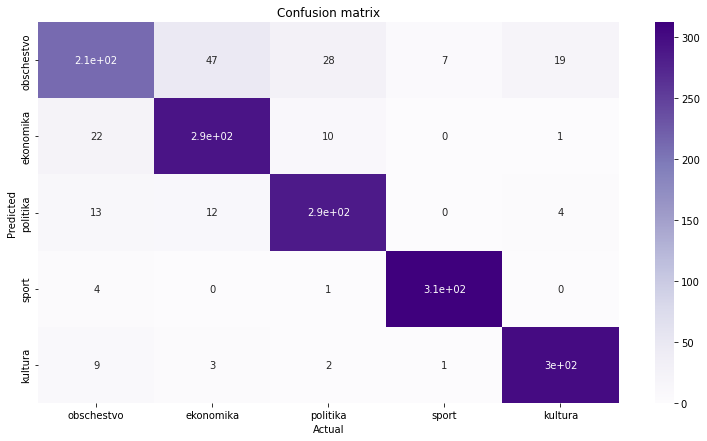

In [222]:
validate_classifier(rfc_grid_search.best_estimator_)

### Support Vector Machine

Training accuracy: 1.0
Test accuracy: 0.9047318611987382

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       312
           1       0.87      0.87      0.87       325
           2       0.92      0.93      0.92       315
           3       0.99      0.98      0.99       317
           4       0.96      0.92      0.94       316

    accuracy                           0.90      1585
   macro avg       0.91      0.90      0.91      1585
weighted avg       0.91      0.90      0.91      1585



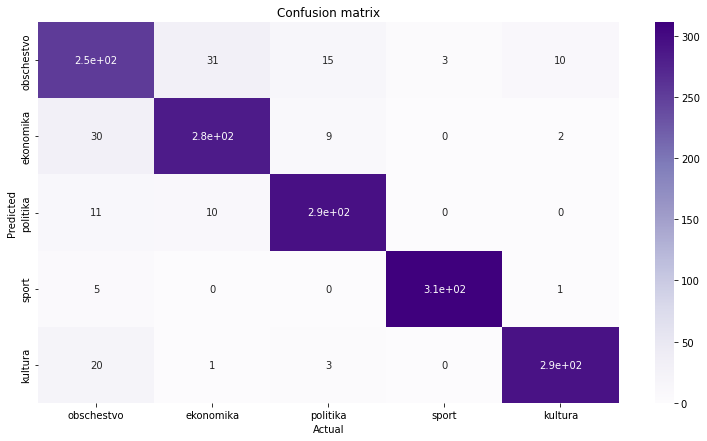

In [223]:
validate_classifier(svm_grid_search.best_estimator_)

### K Nearest Neighbors

Training accuracy: 1.0
Test accuracy: 0.8826498422712934

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       312
           1       0.83      0.84      0.84       325
           2       0.86      0.93      0.89       315
           3       0.98      0.99      0.98       317
           4       0.93      0.95      0.94       316

    accuracy                           0.88      1585
   macro avg       0.88      0.88      0.88      1585
weighted avg       0.88      0.88      0.88      1585



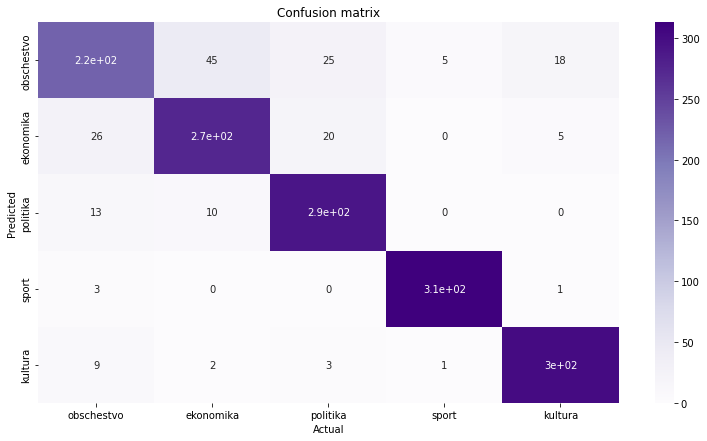

In [224]:
validate_classifier(knn_grid_detailed_search.best_estimator_)

### Multinomial Naïve Bayes

Training accuracy: 0.8662583518930957
Test accuracy: 0.8649842271293375

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       312
           1       0.81      0.86      0.84       325
           2       0.84      0.88      0.86       315
           3       0.98      0.97      0.97       317
           4       0.92      0.92      0.92       316

    accuracy                           0.86      1585
   macro avg       0.86      0.86      0.86      1585
weighted avg       0.86      0.86      0.86      1585



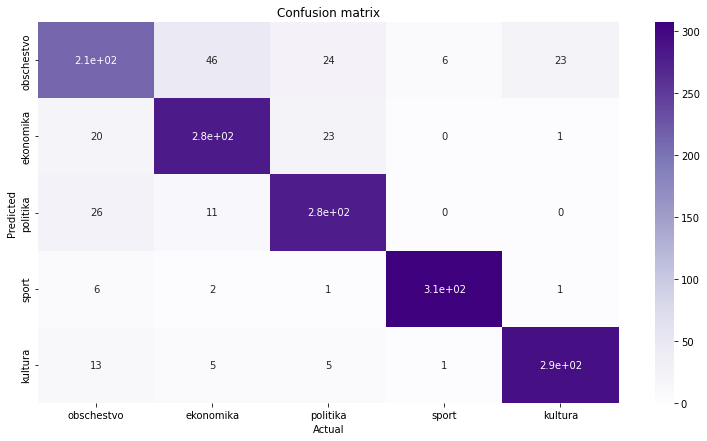

In [225]:
validate_classifier(mnbc_grid_search.best_estimator_)

### Multinomial Logistic Regression

Training accuracy: 0.9207126948775056
Test accuracy: 0.8927444794952681

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       312
           1       0.85      0.88      0.86       325
           2       0.90      0.92      0.91       315
           3       0.98      0.97      0.98       317
           4       0.96      0.92      0.94       316

    accuracy                           0.89      1585
   macro avg       0.89      0.89      0.89      1585
weighted avg       0.89      0.89      0.89      1585



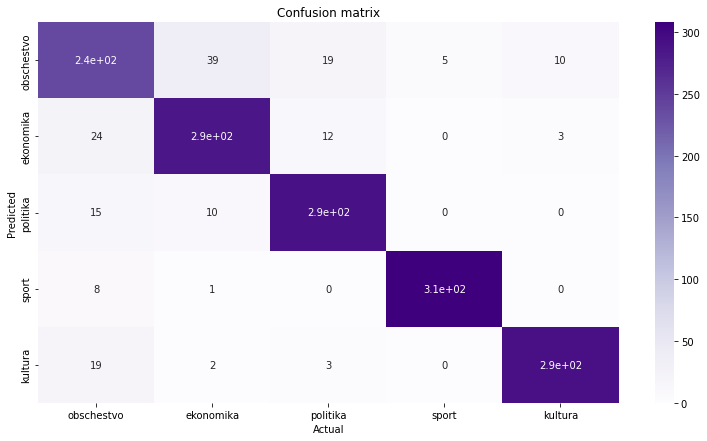

In [226]:
validate_classifier(lr_grid_search.best_estimator_)

### Gradient Boosting Machine

Training accuracy: 1.0
Test accuracy: 0.8946372239747634

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       312
           1       0.83      0.88      0.85       325
           2       0.89      0.94      0.91       315
           3       0.98      0.99      0.99       317
           4       0.95      0.95      0.95       316

    accuracy                           0.89      1585
   macro avg       0.89      0.89      0.89      1585
weighted avg       0.89      0.89      0.89      1585



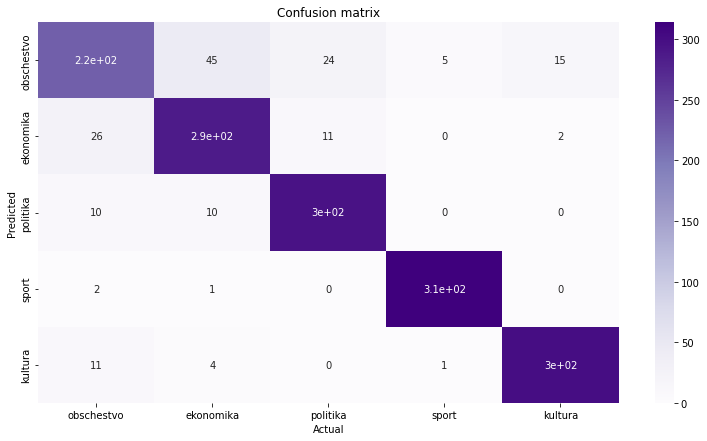

In [227]:
validate_classifier(gbm_grid_search.best_estimator_)

## Best classfier results

In [59]:
svc = load_pickle('tass/classifiers/svm')

In [60]:
predicted = [max(x) for x in svc.best_estimator_.predict_proba(features_test)]

cats = {
    0: [], 1: [], 2: [], 3: [], 4: []
}

for i, label in enumerate(labels_test):    
    cats[label].append(predicted[i])


In [62]:
CATEGORIES = {
    0: 'obschestvo',
    1: 'ekonomika',
    2: 'politika',
    3: 'sport',
    4: 'kultura'
}

In [65]:
colors = ["#e83034", "#ff7f02", "#11c10c", "#047cdd", "#aa29bb"]
dist_plot_style = dict(edgecolor="white", linewidth=2)

def proba_plot(i):
    sns.set_palette([colors[i]])
    plt.figure(figsize=(13,7))
    name = CATEGORIES[i]
    sns.distplot(sorted(cats[i], reverse= True), hist_kws=dist_plot_style).set_title(f'{name} proba distribution')


/Users/leon/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


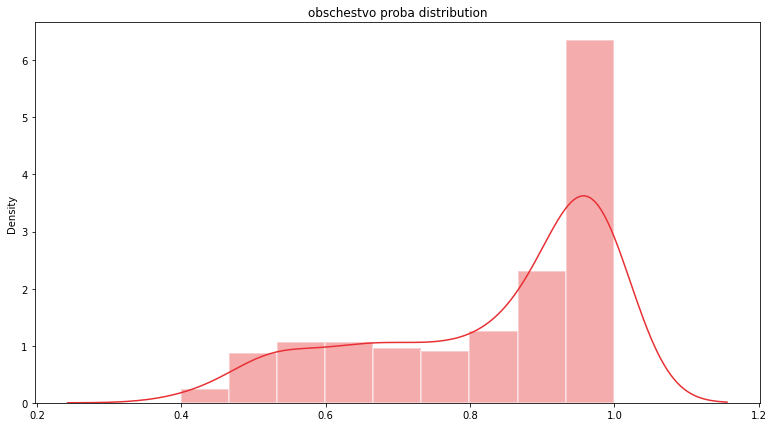

In [66]:
proba_plot(0)

/Users/leon/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


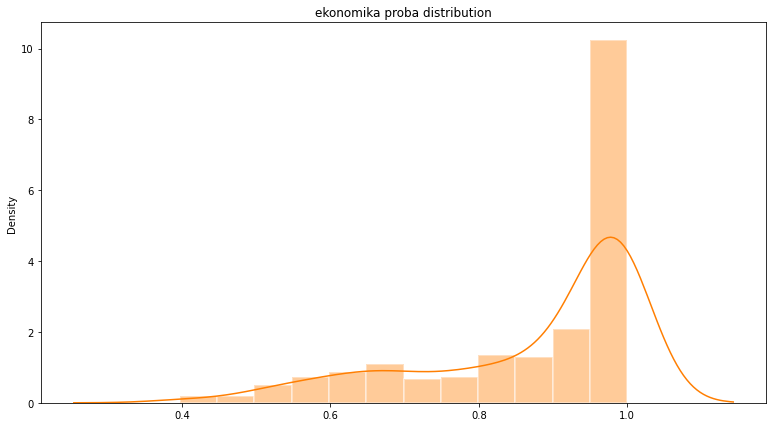

In [67]:
proba_plot(1)

/Users/leon/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


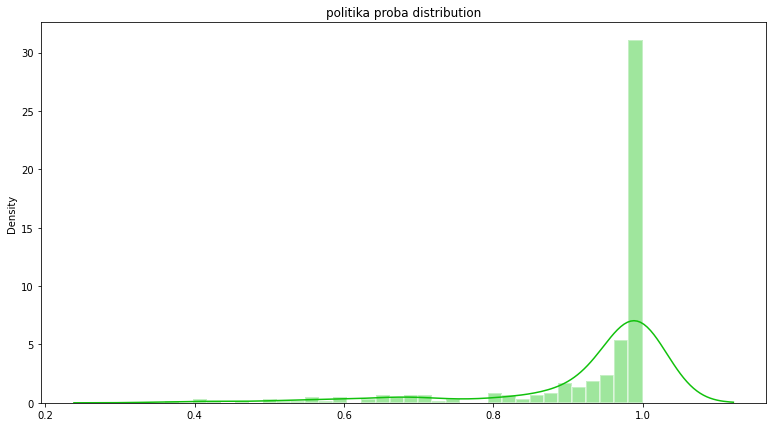

In [68]:
proba_plot(2)

/Users/leon/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


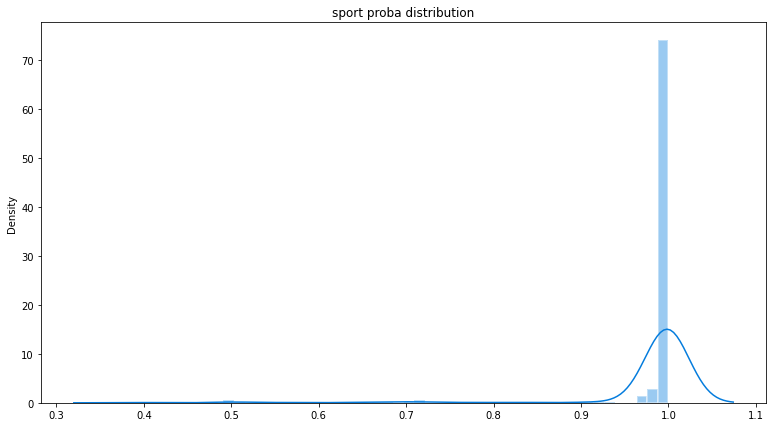

In [69]:
proba_plot(3)

/Users/leon/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


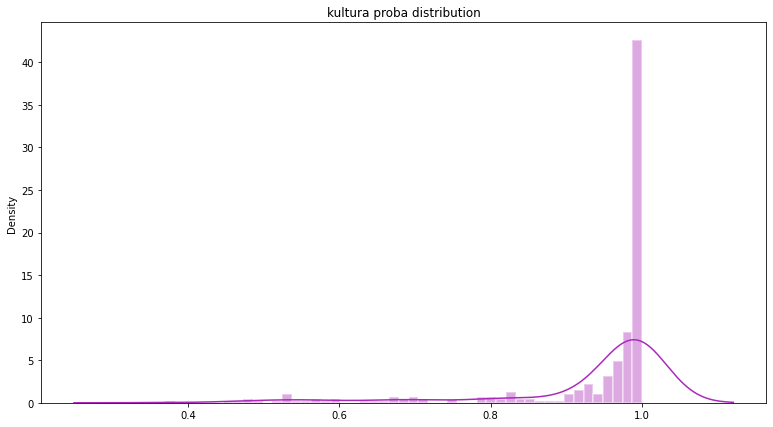

In [70]:
proba_plot(4)

In [72]:
df.sample()

,filename,category,url,text,length,trimmed,stopped,lemmas,code
3302,13622329.txt,ekonomika,tass.ru/ekonomika/13622329,"Новым гендиректором ""Росморпорта"" станет Серге...",1071,новым гендиректором росморпорта станет сергей ...,новым гендиректором росморпорта станет сергей ...,новый гендиректор росморпорт становиться серге...,1
